In [1]:
## Author: Juan Maroñas (jmaronasm@gmail.com). Machine Learning Group, Universidad Autónoma de Madrid
## Deep into Prophet through Tutorials

## Customizing seasonality

In [2]:
## Python
import os

## Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

usetex = mpl.checkdep_usetex(True)

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': usetex,
    'pgf.rcfonts': False,
    'xtick.bottom': True,
    'xtick.labelbottom': True,
    'ytick.left': True,
    'ytick.labelleft': True,
})

mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb,amsfonts,amsthm}'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['axes.titlesize'] = 25


## Prophet
from prophet import Prophet

In [3]:
## Read data
data_dir = os.path.join('../data/','example_wp_log_peyton_manning.csv') 
df       = pd.read_csv(data_dir)

# cast to datetime type
df['ds_plot'] = df['ds']
df['ds']      = pd.to_datetime(df['ds'])


Text(0.5, 1.0, 'Whole temporal serie')

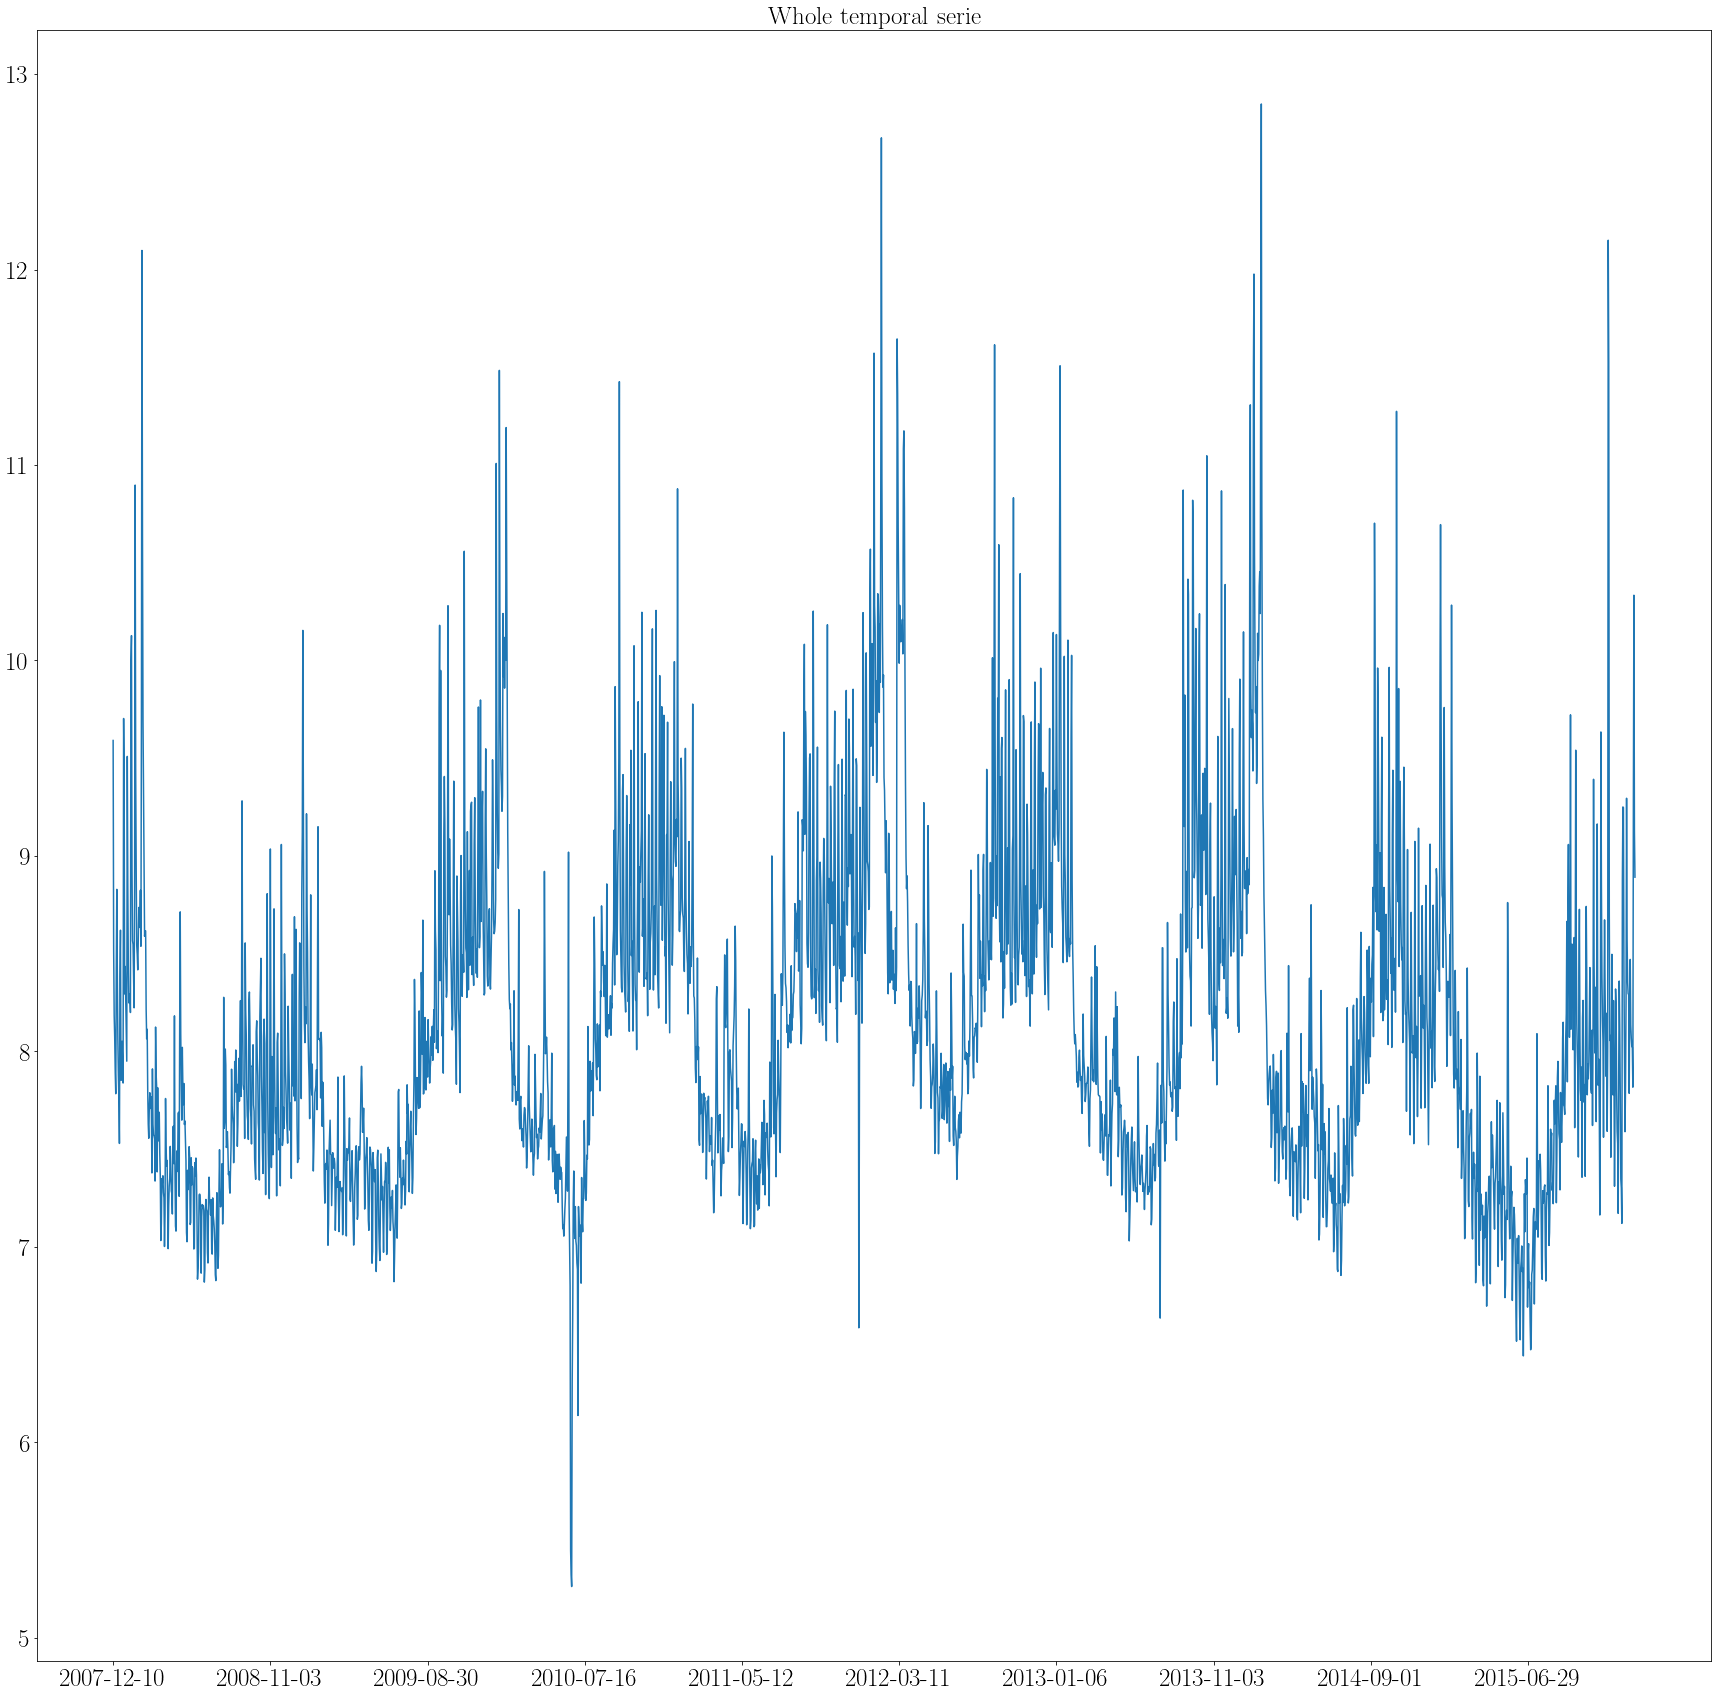

In [4]:
## Visualize whole series
fig, ax = plt.subplots(1,1,figsize=(30,30))

x = np.arange(0,len(df['y']))

ax.plot(x,df['y'])
ax.set_xticks(x[0::300], labels = df['ds_plot'][0::300])
ax.set_title('Whole temporal serie')

# Regarding change points we can see some guess where they might be one change point but we cannot 
# conclude a clear one.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


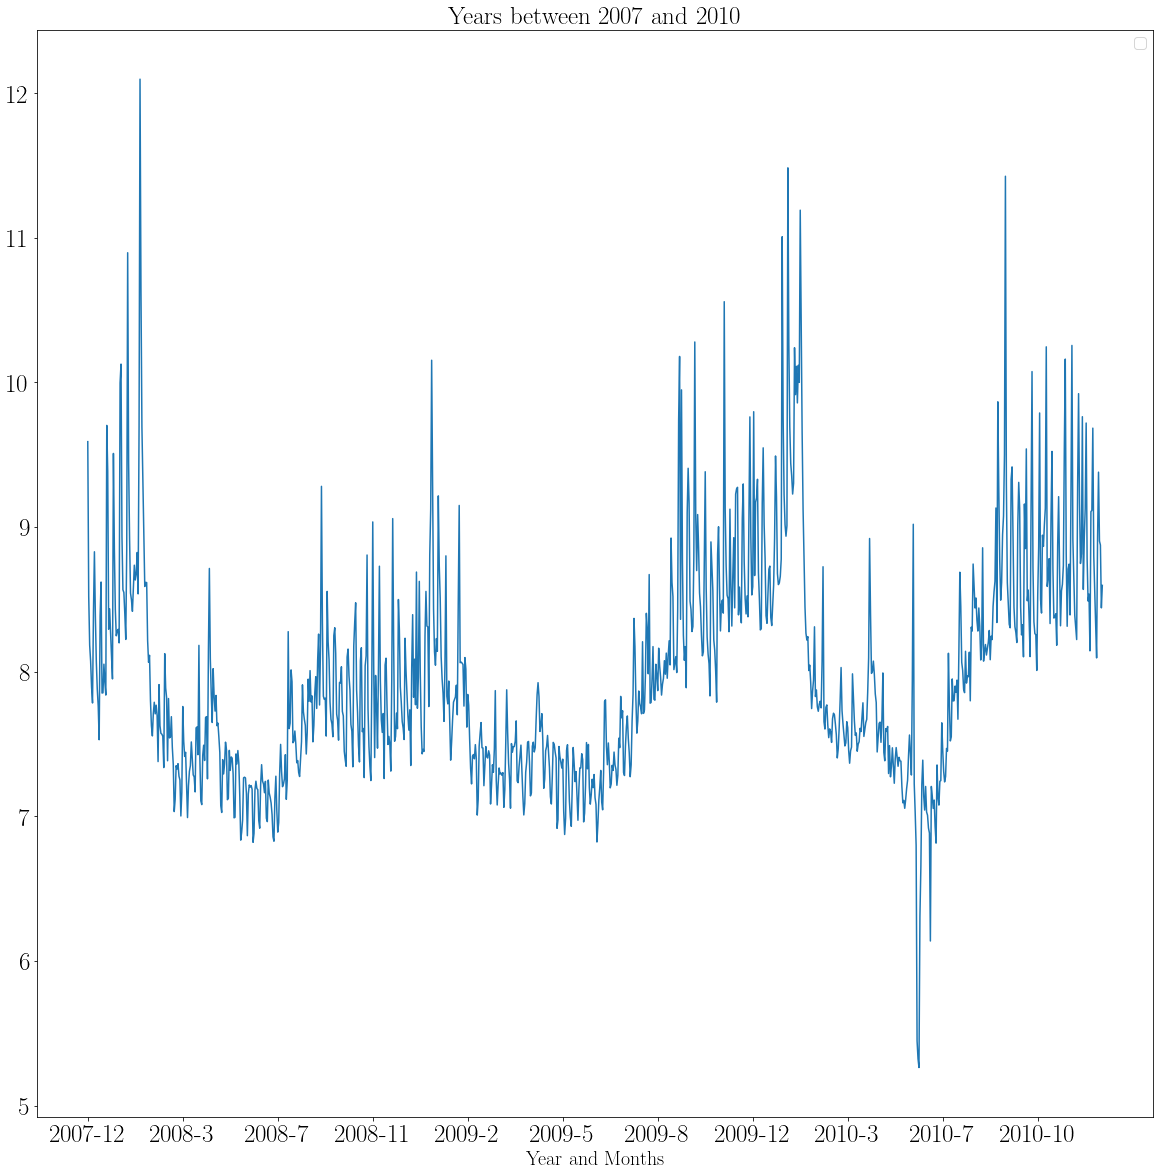

In [5]:
## Visualize a couple of years
target_years = [2007, 2010]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]
                   
fig, ax = plt.subplots(1,1,figsize=(20,20))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x[0::100], labels =  ['{}-{}'.format(i.year,i.month) for i in df_one_year['ds'][0::100] ]  )
ax.set_title('Years between {} and {}'.format(target_years[0],target_years[-1]))
ax.set_xlabel('Year and Months')
ax.legend()

## We can see anual periodicity plus outliers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


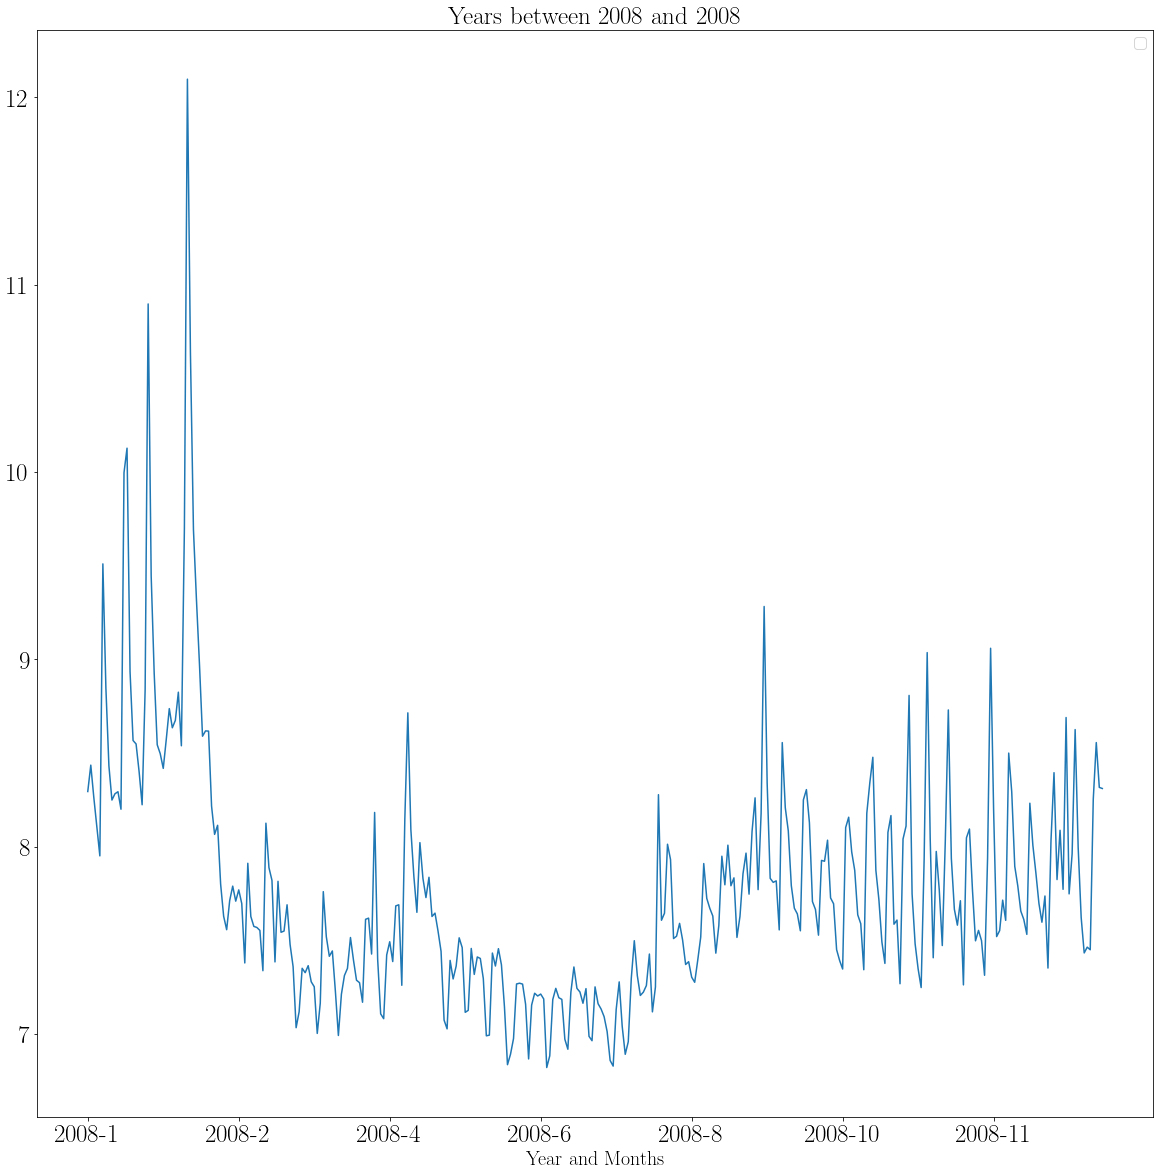

In [6]:
## Visualize a year
target_years = [2008, 2008]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]
                   
fig, ax = plt.subplots(1,1,figsize=(20,20))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x[0::50], labels =  ['{}-{}'.format(i.year,i.month) for i in df_one_year['ds'][0::50] ]  )
ax.set_title('Years between {} and {}'.format(target_years[0],target_years[-1]))
ax.set_xlabel('Year and Months')
ax.legend()

## Let's zoom for month periodicity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


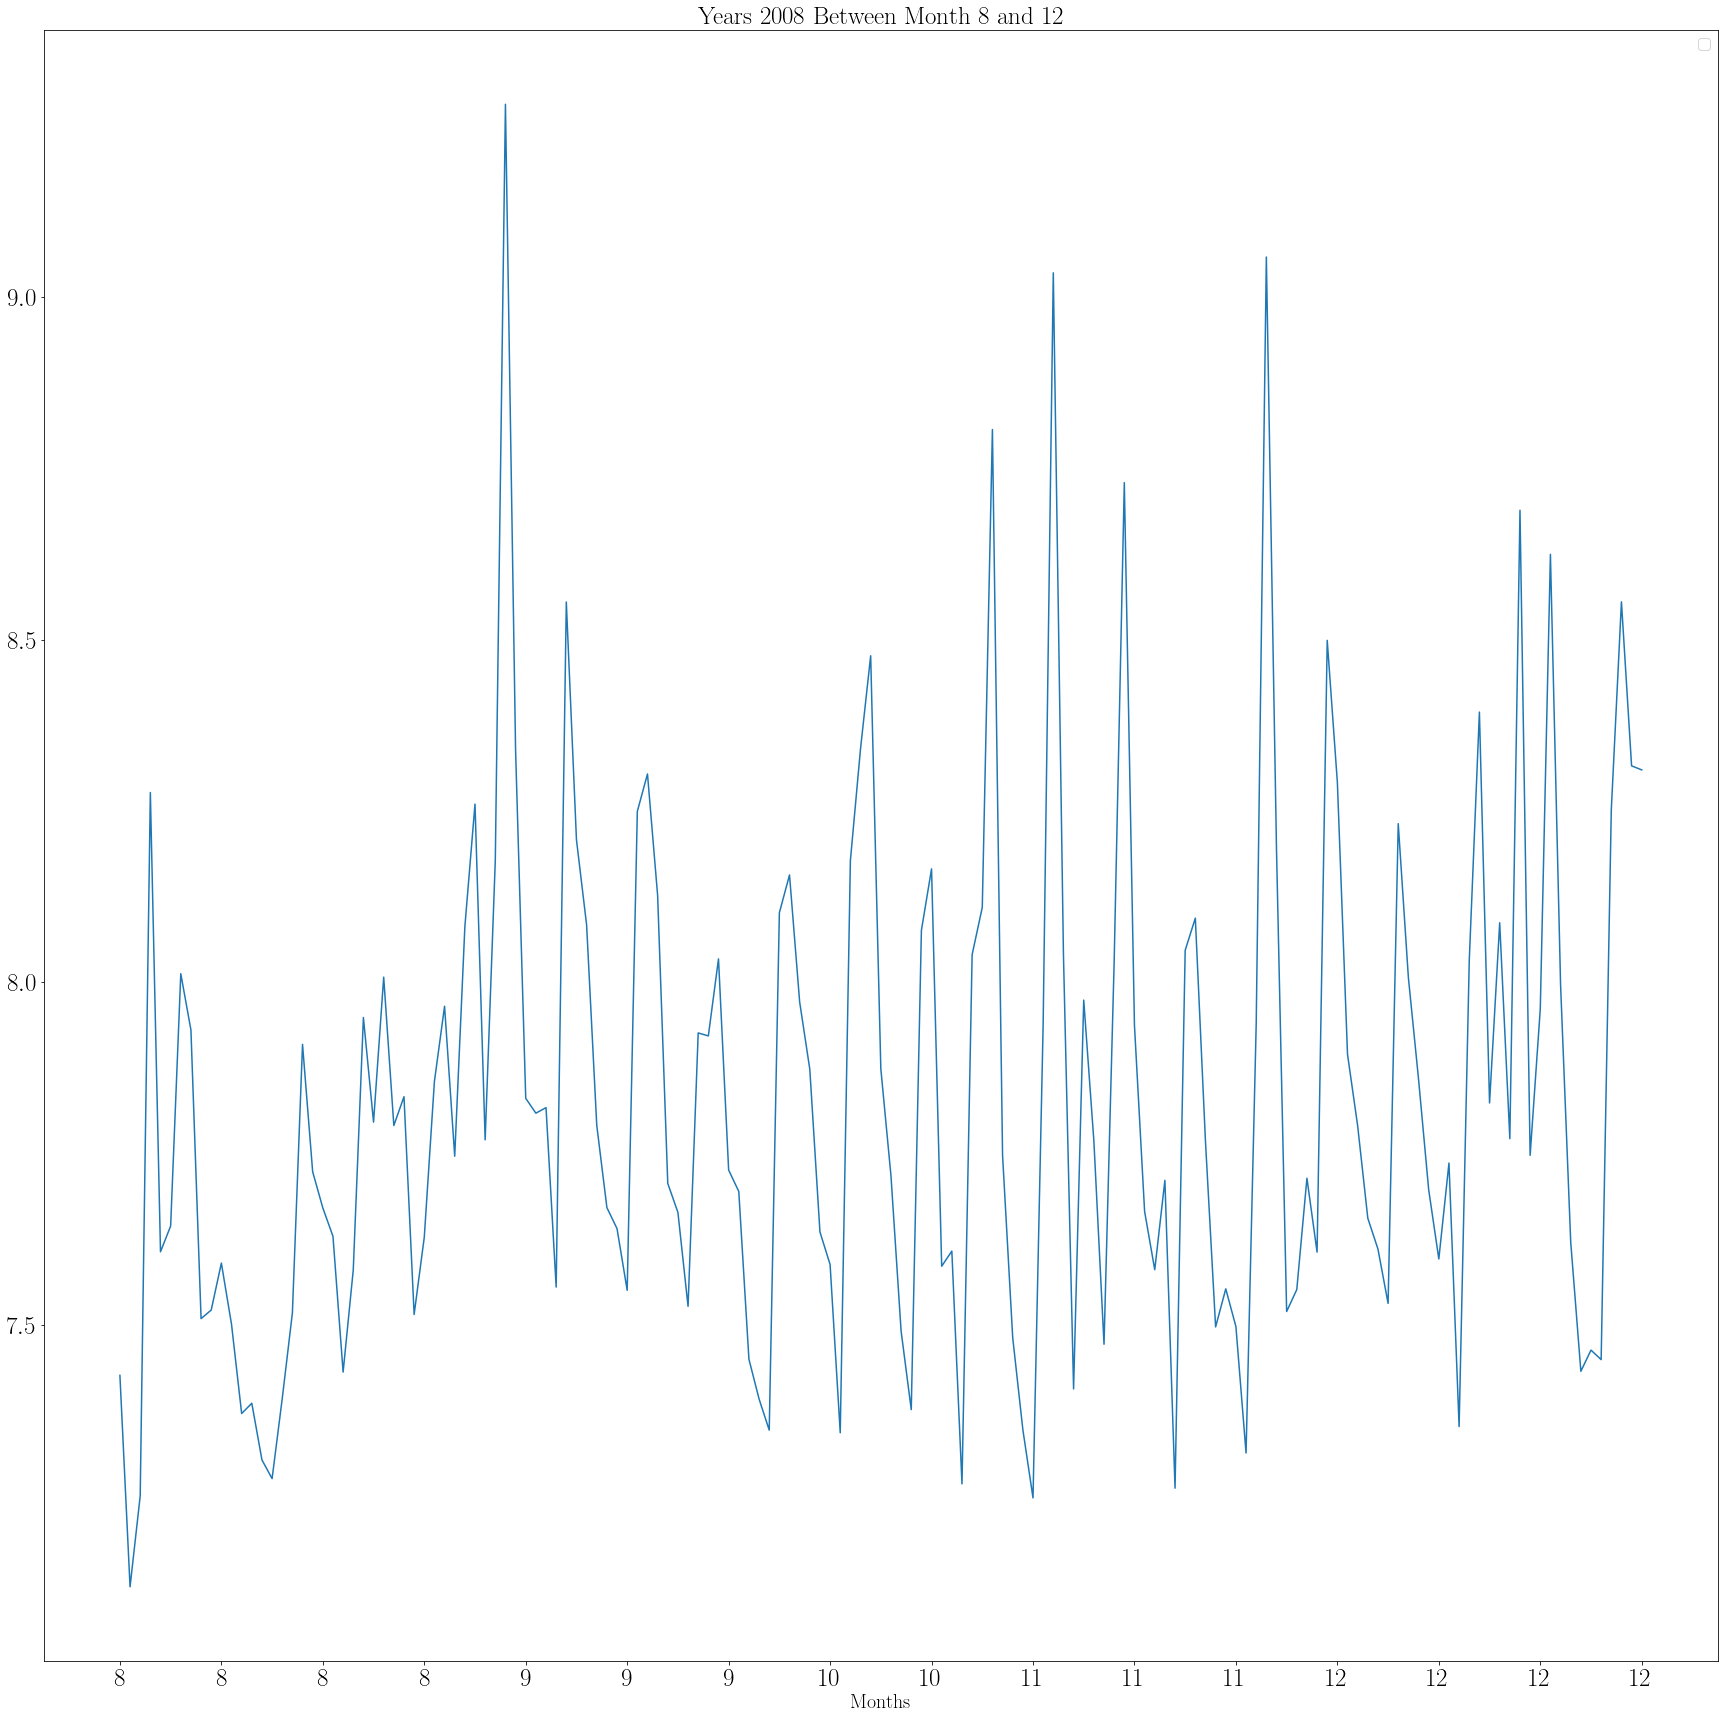

In [7]:
## Visualize a year and a month
target_years = [2008, 2008]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]

target_months  = [8,12]
df_one_year  = df_one_year[ (df_one_year['ds'].dt.month >= target_months[0]) & (df_one_year['ds'].dt.month <= target_months[-1]) ]
                   
fig, ax = plt.subplots(1,1,figsize=(30,30))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x[0::10], labels =  ['{}'.format(i.month) for i in df_one_year['ds'][0::10] ]  )
ax.set_title('Years {} Between Month {} and {}'.format(target_years[0],target_months[0],target_months[-1]))
ax.set_xlabel('Months')
ax.legend()

# We can see monthly periodicity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


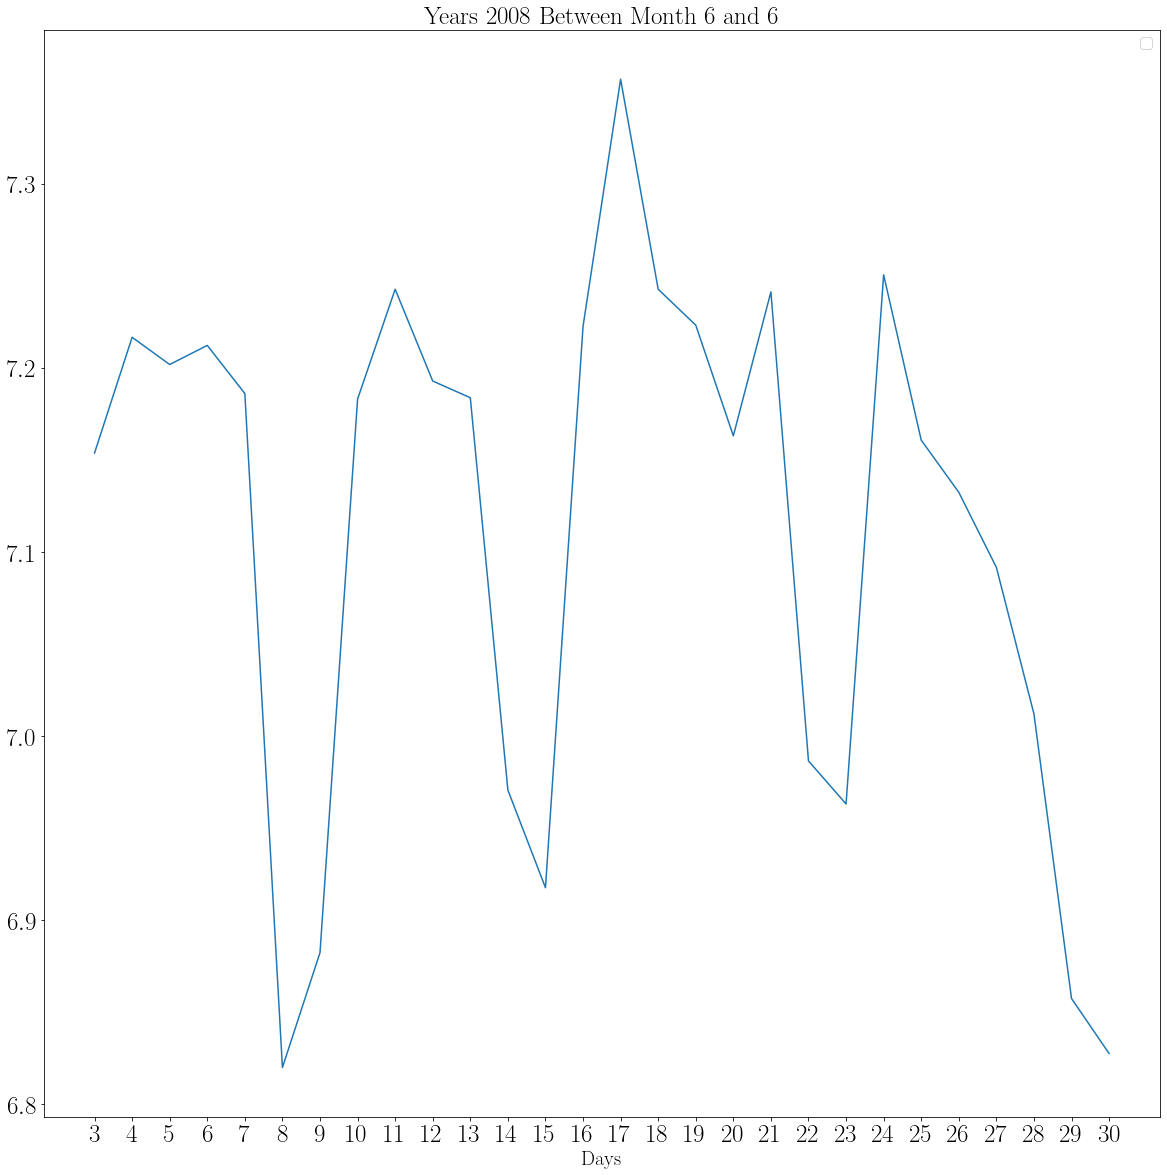

In [8]:
## Visualize a year and a month and a week
target_years = [2008, 2008]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]

target_months  = [6,6]
df_one_year  = df_one_year[ (df_one_year['ds'].dt.month >= target_months[0]) & (df_one_year['ds'].dt.month <= target_months[-1]) ]
                   
#target_days   = [8,28] # three weeks
#df_one_year   = df_one_year[ (df_one_year['ds'].dt.day >= target_days [0]) & (df_one_year['ds'].dt.day <= target_days [-1]) ]
                   
    
fig, ax = plt.subplots(1,1,figsize=(20,20))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x, labels =  ['{}'.format(i.day) for i in df_one_year['ds'] ]  )
ax.set_title('Years {} Between Month {} and {}'.format(target_years[0],target_months[0],target_months[-1]))
ax.set_xlabel('Days')
ax.legend()

# We observe weekly periodicity

In [9]:
## ========================================================================================== ##
## ===================================== CASE STUDY 1  ====================================== ##

## This first part studies how can we add seasonality to the model and how it influences. It also breakdown
#  different seasonalities contributions.

## ================================== Fit using Point Estimate  ============================= ##

option_1 = False

if option_1:
    add_month_seasonality   = False
    add_year_multiplicative = False
    
    year_seasonality        = True   # uses N = 10. If rather than true we specify a number 
                                     # then we model year seasonality with N set to that number
    weekly_seasonality      = False
    daily_seasonality       = False
    
option_2 = False

if option_2:
    add_month_seasonality   = False
    add_year_multiplicative = False
    
    year_seasonality        = True   # uses N = 10. If rather than true we specify a number 
                                     # then we model year seasonality with N set to that number
    weekly_seasonality      = True   # uses N = 3
    daily_seasonality       = False  
    
option_3 = False
if option_3:
    add_month_seasonality   = True   # Uses whatever you specify below
    add_year_multiplicative = False
    
    year_seasonality        = True   # uses N = 10. If rather than true we specify a number 
                                     # then we model year seasonality with N set to that number
    weekly_seasonality      = True   # uses N = 3
    daily_seasonality       = False  
    
option_4 = True

if option_4:
    ## ===== Warning: this option does not make sense from a modeling view point ======
    #  Note that periodicity in the days implies that we need subdaily information such as minute or hour information
    #  You can check what happens if you tell prophet to add it with this option
    add_month_seasonality   = True   # Uses whatever you specify below
    add_year_multiplicative = False
    
    year_seasonality        = True   # uses N = 10. If rather than true we specify a number 
                                     # then we model year seasonality with N set to that number
    weekly_seasonality      = True   # uses N = 3
    daily_seasonality       = True     
    
    
## Create prophet model
model = Prophet(
                    interval_width      = 0.95,  
                    uncertainty_samples = 1000,
                    yearly_seasonality  = year_seasonality,   
                    weekly_seasonality  = weekly_seasonality,  
                    daily_seasonality   = daily_seasonality ,  
                    seasonality_mode    = 'additive' # (default). Can also be set to multiplicative and then all the
                                                     # seasonalities are multiplied to the trend model.
                )

# Those are seasonalities that can be specified in the constructor. If we want monthly seasonality then
if add_month_seasonality:
    model.add_seasonality( 
                            name          = 'monthly'  ,
                            period        = 30         ,  # specified in days
                            fourier_order = 5          , # the value of N
                            mode          = 'additive' , # we set it to be aditive
                          )
    
# In the constructor by saying yearly_seasonality = True or specify a number we have additive year seasonality.
# We might of course think that year seasonality is additive and multiplicative and so we just need to add it
if add_year_multiplicative:
    model.add_seasonality( 
                            name          = 'multiplicative_yearly'  ,
                            period        = 365                      ,  # specified in days
                            fourier_order = 10                        , # the value of N
                            mode          = 'multiplicative'         , # we set it to be aditive
                          )

In [10]:
## Train the model using point estimates. Use default prophet model configuration from jupyter 1.
#  Prophet by default (if possible) adds a year seasonality and weekly seasonality models (only if daily)
#  data is available. It also models daily seasonality if subdaily data is provided.
#  We will remove this weekly seasonality model and then add it.
model.fit(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.74    0.00800218       497.327           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7989.45    0.00192578       389.242           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       7995.16   0.000225669       517.431   6.862e-07       0.001      303  LS failed, Hessian reset 
     299       7998.83    0.00774047       373.143      0.6657           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       8000.15   1.29091e-05       89.8055   1.207e-07       0.001      487  LS failed, Hessian reset 
     399       8000.66   0.000644685       153.025           1           1      539   
    Iter      log pro

      alpha0  # evals  Notes 
     460       8002.84   6.09863e-05       349.967   2.208e-07       0.001      662  LS failed, Hessian reset 
     499       8003.78   8.44389e-05       81.1819      0.3138      0.3138      706   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       8004.73   0.000429242       394.149           1           1      822   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699        8006.5   0.000551433       239.774      0.4728      0.4728      951   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     732       8006.87   1.61537e-05        90.216    8.74e-08       0.001     1040  LS failed, Hessian reset 
     799       8007.21   9.94986e-05       134.484           1           1     1125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       8007.69   0.00026

In [11]:
## Make a prediction. In this case we predict in the same time slot we have train on
forecast = model.predict(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [12]:
## Make a prediction.

print(model.params.keys())

print('Sigma observation model \n ', model.params['sigma_obs'])

print('Fourier coefficients    \n ', model.params['beta'].shape) 

print('Places where prophet thinks a change point appears \n ', model.params['delta'].shape)

print('Growth rate parameter \n',  model.params['k'].shape)

print('Offset parameter \n',  model.params['m'].shape)

print('No idea \n', model.params['trend'].shape)

dict_keys(['k', 'm', 'delta', 'sigma_obs', 'beta', 'trend'])
Sigma observation model 
  [[0.03759608]]
Fourier coefficients    
  (1, 44)
Places where prophet thinks a change point appears 
  (1, 25)
Growth rate parameter 
 (1, 1)
Offset parameter 
 (1, 1)
No idea 
 (1, 2905)


Text(0.5, 1.0, 'Full forecast')

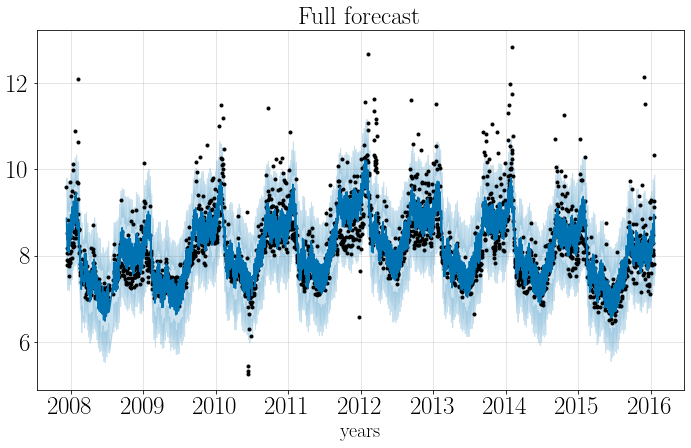

In [13]:
## Visualize forecasting
fig = model.plot(forecast)
plt.xlabel('years')
plt.ylabel('')
plt.title('Full forecast')

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed

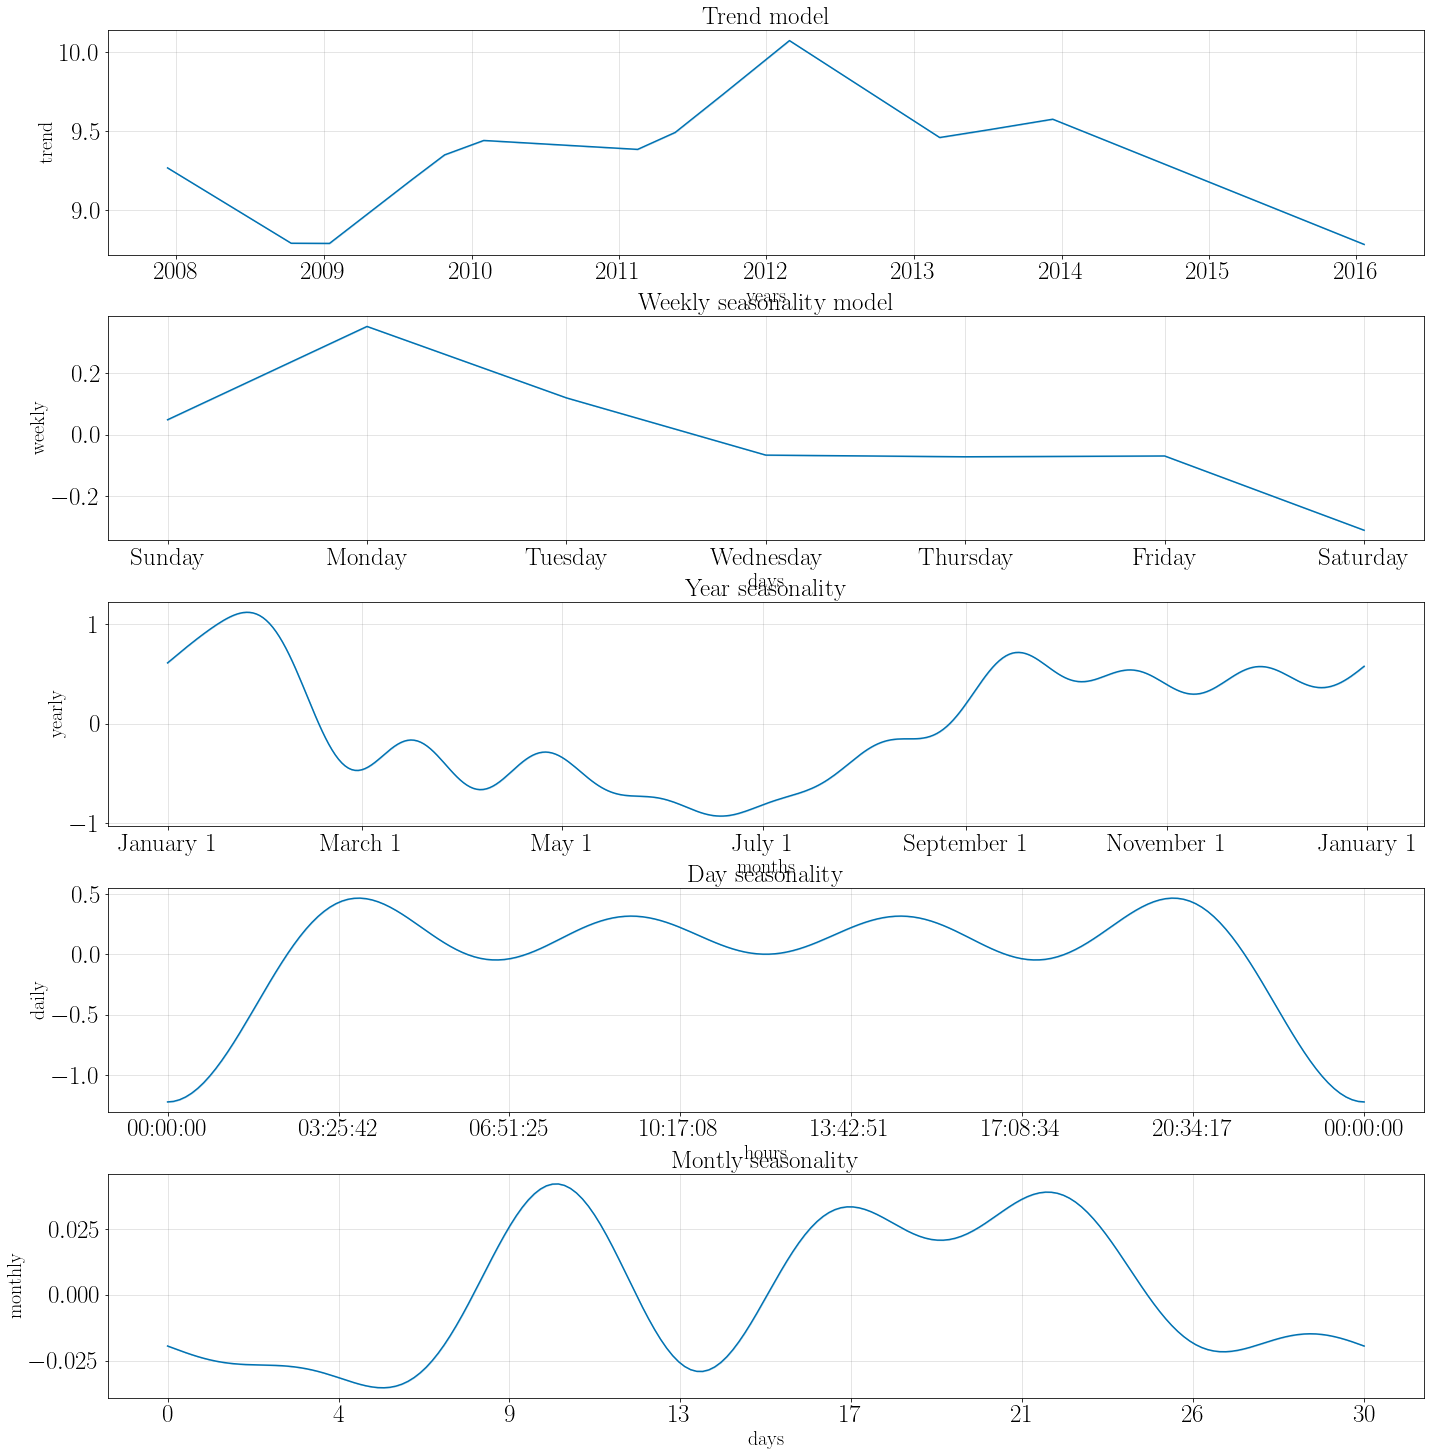

In [14]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(forecast, figsize = (20,20) )

if option_1:
    ax1,ax2 = fig.get_axes()
elif option_2:
    ax1,ax2,ax3 = fig.get_axes()
elif option_3:
    ax1,ax2,ax3,ax4 = fig.get_axes()
elif option_4:
    ax1,ax2,ax3,ax4, ax5 = fig.get_axes()
    
if option_1:
    ax1.set_xlabel('years')
    ax1.set_title('Trend model')

    ax2.set_title('Year seasonality model')
    ax2.set_xlabel('months')

if option_2:
    ax1.set_xlabel('years')
    ax1.set_title('Trend model')

    ax2.set_title('Weekly seasonality model')
    ax2.set_xlabel('days')
    
    ax3.set_title('Year seasonality')
    ax3.set_xlabel('months')
    
if option_3:
    ax1.set_xlabel('years')
    ax1.set_title('Trend model')

    ax2.set_title('Weekly seasonality model')
    ax2.set_xlabel('days')
    
    ax3.set_title('Year seasonality')
    ax3.set_xlabel('months')
    
    ax4.set_title('Montly seasonality')
    ax4.set_xlabel('days')
    
if option_4:
    ax1.set_xlabel('years')
    ax1.set_title('Trend model')

    ax2.set_title('Weekly seasonality model')
    ax2.set_xlabel('days')
    
    ax3.set_title('Year seasonality')
    ax3.set_xlabel('months')
    
    ax4.set_title('Day seasonality')
    ax4.set_xlabel('hours')
    
    ax5.set_title('Montly seasonality')
    ax5.set_xlabel('days')
    


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'monthly', 'monthly_lower',
       'monthly_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


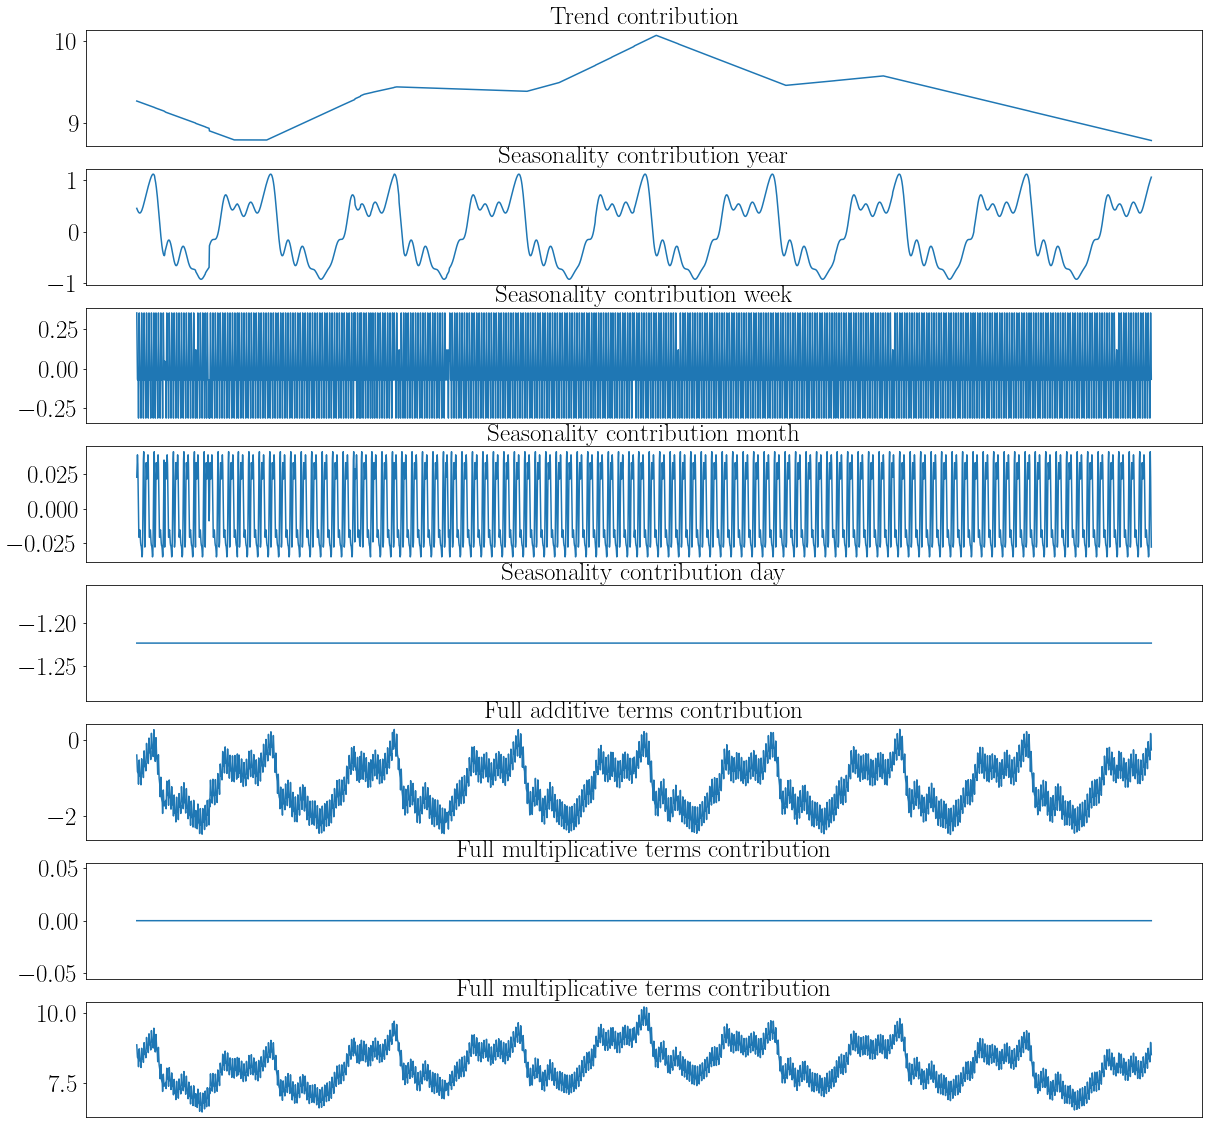

In [15]:
## Visualize the contribution of the individual models to the prediction. y(t) = g(t)+s(t) etc
print(forecast.keys())

x = np.arange(0,len(df['y']))
if option_1:
    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(20,20))
elif option_2:
    fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(20,20))
elif option_3:
    fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,20))
elif option_4:
    fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(8,1,figsize=(20,20))
    
if option_1:
    ax1.plot(forecast['trend'])
    ax1.fill_between(np.arange(0,len(forecast['trend'])),forecast['trend_lower'],forecast['trend_upper'],alpha = 0.5)
    ax1.set_title('Trend contribution')
    ax1.set_xticks([])

    ax2.plot(forecast['yearly'])
    ax2.fill_between(np.arange(0,len(forecast['yearly'])),forecast['yearly_lower'],forecast['yearly_upper'],alpha = 0.5)
    ax2.set_title('Seasonality contribution')
    ax2.set_xticks([])

    ax3.plot(forecast['additive_terms'])
    ax3.fill_between(np.arange(0,len(forecast['additive_terms'])),forecast['additive_terms_lower'],forecast['additive_terms_upper'],alpha = 0.5)
    ax3.set_title('Full additive terms contribution')
    ax3.set_xticks([])

    ax4.plot(forecast['multiplicative_terms'])
    ax4.fill_between(np.arange(0,len(forecast['multiplicative_terms'])),forecast['multiplicative_terms_lower'],forecast['multiplicative_terms_upper'],alpha = 0.9)
    ax4.set_title('Full multiplicative terms contribution')
    ax4.set_xticks([])


    ax5.plot(forecast['trend']+forecast['additive_terms'])
    ax5.set_title('Full multiplicative terms contribution')
    ax5.set_xticks([])

    
elif option_2:
    ax1.plot(forecast['trend'])
    ax1.fill_between(np.arange(0,len(forecast['trend'])),forecast['trend_lower'],forecast['trend_upper'],alpha = 0.5)
    ax1.set_title('Trend contribution')
    ax1.set_xticks([])

    ax2.plot(forecast['yearly'])
    ax2.fill_between(np.arange(0,len(forecast['yearly'])),forecast['yearly_lower'],forecast['yearly_upper'],alpha = 0.5)
    ax2.set_title('Seasonality contribution year')
    ax2.set_xticks([])
    
    ax3.plot(forecast['weekly'])
    ax3.fill_between(np.arange(0,len(forecast['weekly'])),forecast['weekly_lower'],forecast['weekly_upper'],alpha = 0.5)
    ax3.set_title('Seasonality contribution weel')
    ax3.set_xticks([])

    ax4.plot(forecast['additive_terms'])
    ax4.fill_between(np.arange(0,len(forecast['additive_terms'])),forecast['additive_terms_lower'],forecast['additive_terms_upper'],alpha = 0.5)
    ax4.set_title('Full additive terms contribution')
    ax4.set_xticks([])

    ax5.plot(forecast['multiplicative_terms'])
    ax5.fill_between(np.arange(0,len(forecast['multiplicative_terms'])),forecast['multiplicative_terms_lower'],forecast['multiplicative_terms_upper'],alpha = 0.9)
    ax5.set_title('Full multiplicative terms contribution')
    ax5.set_xticks([])

    ax6.plot(forecast['trend']+forecast['additive_terms'])
    ax6.set_title('Full multiplicative terms contribution')
    ax6.set_xticks([])
    
elif option_3:
    ax1.plot(forecast['trend'])
    ax1.fill_between(np.arange(0,len(forecast['trend'])),forecast['trend_lower'],forecast['trend_upper'],alpha = 0.5)
    ax1.set_title('Trend contribution')
    ax1.set_xticks([])

    ax2.plot(forecast['yearly'])
    ax2.fill_between(np.arange(0,len(forecast['yearly'])),forecast['yearly_lower'],forecast['yearly_upper'],alpha = 0.5)
    ax2.set_title('Seasonality contribution year')
    ax2.set_xticks([])
    
    ax3.plot(forecast['weekly'])
    ax3.fill_between(np.arange(0,len(forecast['weekly'])),forecast['weekly_lower'],forecast['weekly_upper'],alpha = 0.5)
    ax3.set_title('Seasonality contribution week')
    ax3.set_xticks([])
    
    ax4.plot(forecast['monthly'])
    ax4.fill_between(np.arange(0,len(forecast['monthly'])),forecast['monthly_lower'],forecast['monthly_upper'],alpha = 0.5)
    ax4.set_title('Seasonality contribution month')
    ax4.set_xticks([])

    ax5.plot(forecast['additive_terms'])
    ax5.fill_between(np.arange(0,len(forecast['additive_terms'])),forecast['additive_terms_lower'],forecast['additive_terms_upper'],alpha = 0.5)
    ax5.set_title('Full additive terms contribution')
    ax5.set_xticks([])

    ax6.plot(forecast['multiplicative_terms'])
    ax6.fill_between(np.arange(0,len(forecast['multiplicative_terms'])),forecast['multiplicative_terms_lower'],forecast['multiplicative_terms_upper'],alpha = 0.9)
    ax6.set_title('Full multiplicative terms contribution')
    ax6.set_xticks([])

    ax7.plot(forecast['trend']+forecast['additive_terms'])
    ax7.set_title('Full multiplicative terms contribution')
    ax7.set_xticks([])

elif option_4:
    
    ax1.plot(forecast['trend'])
    ax1.fill_between(np.arange(0,len(forecast['trend'])),forecast['trend_lower'],forecast['trend_upper'],alpha = 0.5)
    ax1.set_title('Trend contribution')
    ax1.set_xticks([])

    ax2.plot(forecast['yearly'])
    ax2.fill_between(np.arange(0,len(forecast['yearly'])),forecast['yearly_lower'],forecast['yearly_upper'],alpha = 0.5)
    ax2.set_title('Seasonality contribution year')
    ax2.set_xticks([])
    
    ax3.plot(forecast['weekly'])
    ax3.fill_between(np.arange(0,len(forecast['weekly'])),forecast['weekly_lower'],forecast['weekly_upper'],alpha = 0.5)
    ax3.set_title('Seasonality contribution week')
    ax3.set_xticks([])
    
    ax4.plot(forecast['monthly'])
    ax4.fill_between(np.arange(0,len(forecast['monthly'])),forecast['monthly_lower'],forecast['monthly_upper'],alpha = 0.5)
    ax4.set_title('Seasonality contribution month')
    ax4.set_xticks([])
    
    ax5.plot(forecast['daily'])
    ax5.fill_between(np.arange(0,len(forecast['daily'])),forecast['daily_lower'],forecast['daily_upper'],alpha = 0.5)
    ax5.set_title('Seasonality contribution day')
    ax5.set_xticks([])

    ax6.plot(forecast['additive_terms'])
    ax6.fill_between(np.arange(0,len(forecast['additive_terms'])),forecast['additive_terms_lower'],forecast['additive_terms_upper'],alpha = 0.5)
    ax6.set_title('Full additive terms contribution')
    ax6.set_xticks([])

    ax7.plot(forecast['multiplicative_terms'])
    ax7.fill_between(np.arange(0,len(forecast['multiplicative_terms'])),forecast['multiplicative_terms_lower'],forecast['multiplicative_terms_upper'],alpha = 0.9)
    ax7.set_title('Full multiplicative terms contribution')
    ax7.set_xticks([])

    ax8.plot(forecast['trend']+forecast['additive_terms'])
    ax8.set_title('Full multiplicative terms contribution')
    ax8.set_xticks([])

    

In [16]:
## ========================================================================================== ##
## ===================================== CASE STUDY 2  ====================================== ##
## This second part studies the effect on the number of fourier coefficients.

N = 100   
        # Number of fourier coefficients. Prophet sets default values for this parameters depending on the type of 
        # seasonality. 10 is the default value for year which will be the case under study. This default value
        # was their choice for their problem of study.
    
        # Try different values of N. Lower N means the seasonality is smoother (can underfit) and higher N implies
        # more wiggly functions (can learn noise and thus overfit).
        
        # This parameter can not be infered using gradient based optimization nor sampled using Stan (since stan 
        # can only sample from continuous variables although they have some ways to do it for discrete). Advanced
        # solution could be to check if a gibbs sampler within an MCMC can be used here to sample N.

## Create prophet model
model = Prophet(
                    interval_width      = 0.95,  
                    uncertainty_samples = 1000,
                    yearly_seasonality  = N,   
                    weekly_seasonality  = False,  
                    daily_seasonality   = False ,  
                    seasonality_mode    = 'additive' 
                )


In [17]:
model.fit(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7892.62     0.0140754       439.732           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     190        7908.8   0.000495793       228.636   3.123e-06       0.001      270  LS failed, Hessian reset 
     199       7909.19   0.000902412       554.117      0.2754      0.2754      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7913.16    0.00119068        181.55      0.5922      0.5922      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       7915.83   0.000187996       194.349   1.222e-06       0.001      503  LS failed, Hessian reset 
     399       7916.37   0.000154205       115.891      0.4616      0.4616      554   
    Iter      log pro

In [18]:
forecast = model.predict(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
## Make a prediction.

print(model.params.keys())

print('Sigma observation model \n ', model.params['sigma_obs'])

print('Fourier coefficients    \n ', model.params['beta'].shape) 

print('Places where prophet thinks a change point appears \n ', model.params['delta'].shape)

print('Growth rate parameter \n',  model.params['k'].shape)

print('Offset parameter \n',  model.params['m'].shape)

print('No idea \n', model.params['trend'].shape)

dict_keys(['k', 'm', 'delta', 'sigma_obs', 'beta', 'trend'])
Sigma observation model 
  [[0.03877967]]
Fourier coefficients    
  (1, 200)
Places where prophet thinks a change point appears 
  (1, 25)
Growth rate parameter 
 (1, 1)
Offset parameter 
 (1, 1)
No idea 
 (1, 2905)


Text(0.5, 1.0, 'Full forecast')

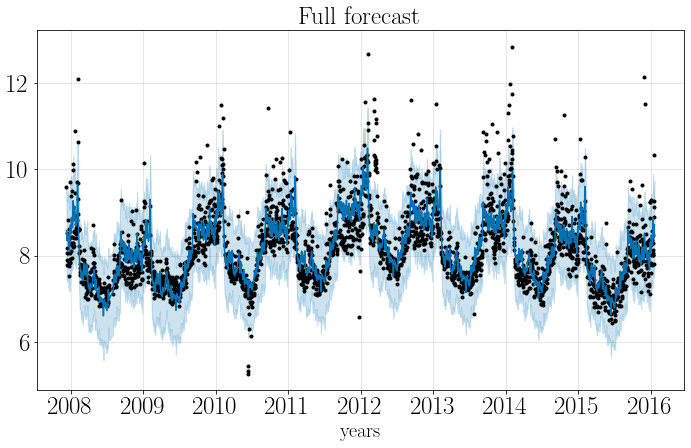

In [20]:
## Visualize forecasting
fig = model.plot(forecast)
plt.xlabel('years')
plt.ylabel('')
plt.title('Full forecast')

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 146.85921203689307, 'months')

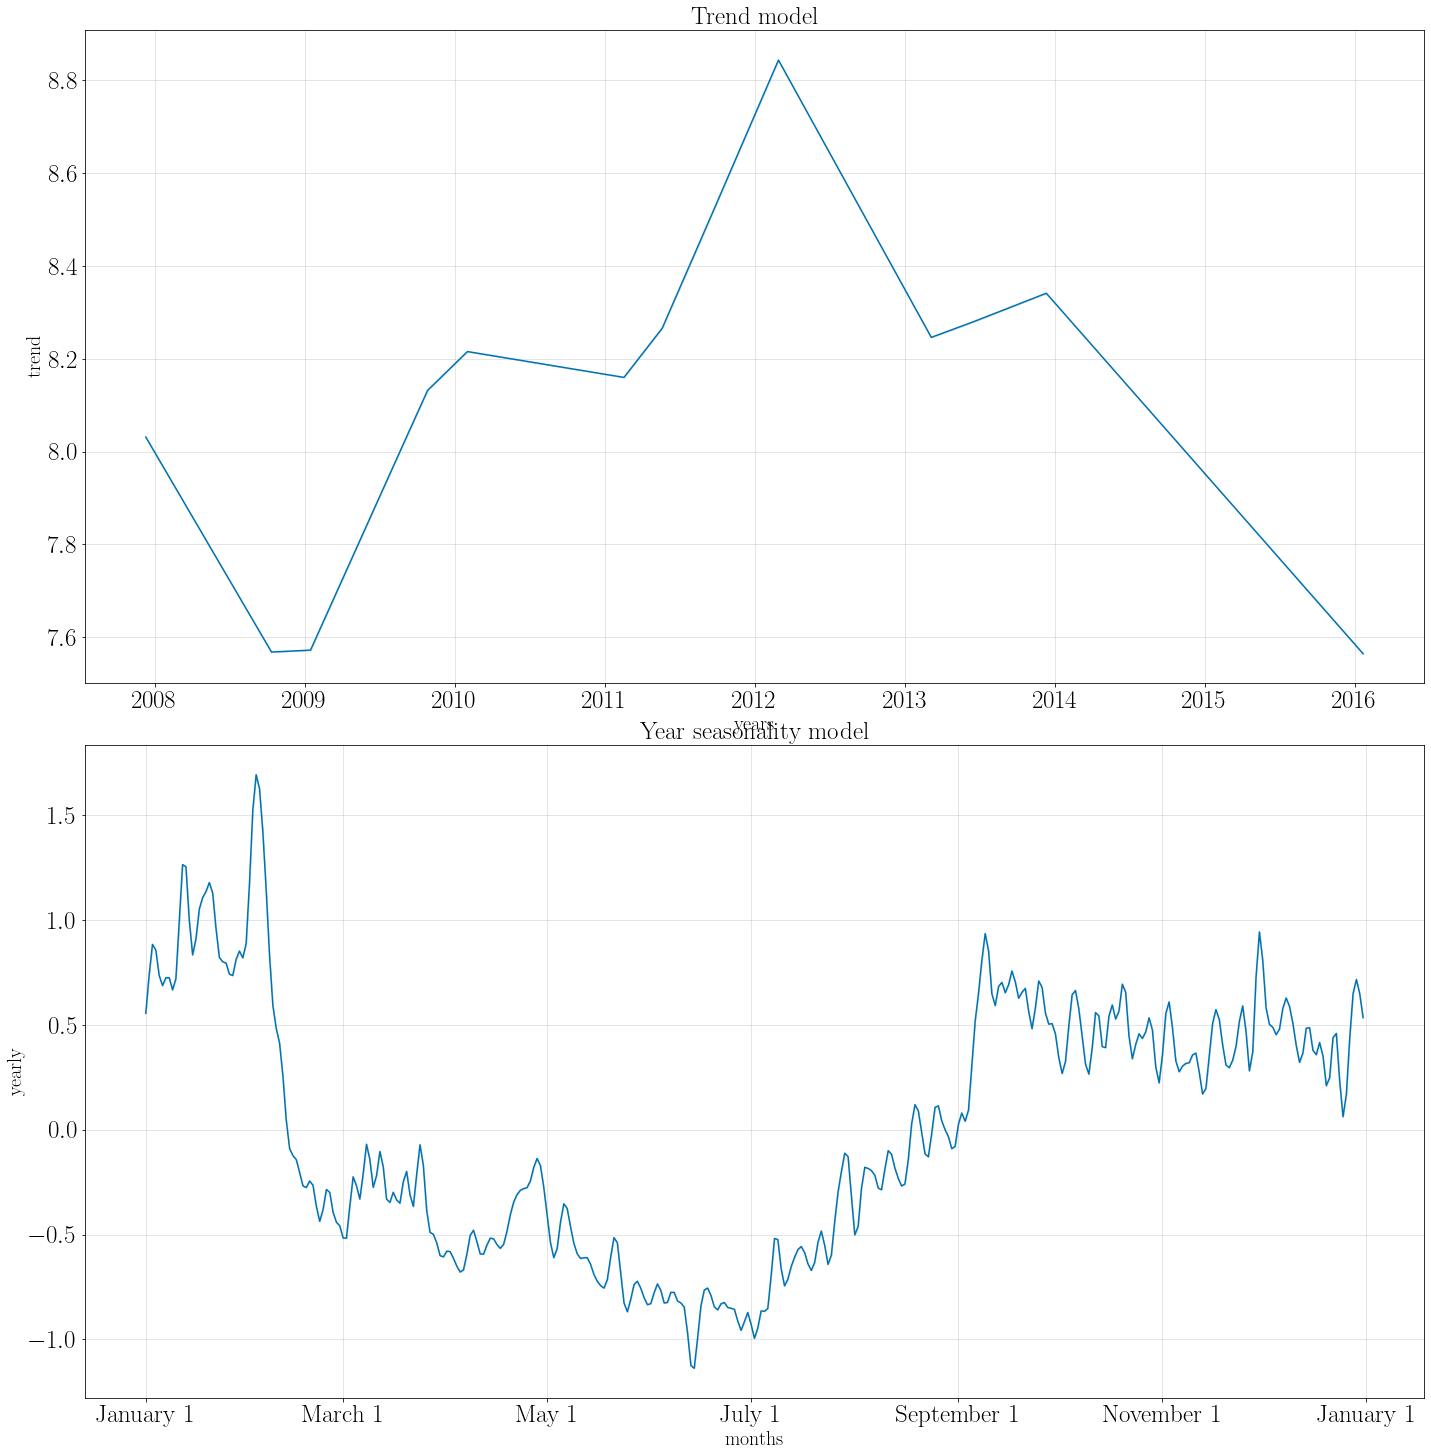

In [21]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(forecast, figsize = (20,20) )


ax1,ax2 = fig.get_axes()


ax1.set_xlabel('years')
ax1.set_title('Trend model')

ax2.set_title('Year seasonality model')
ax2.set_xlabel('months')

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


[]

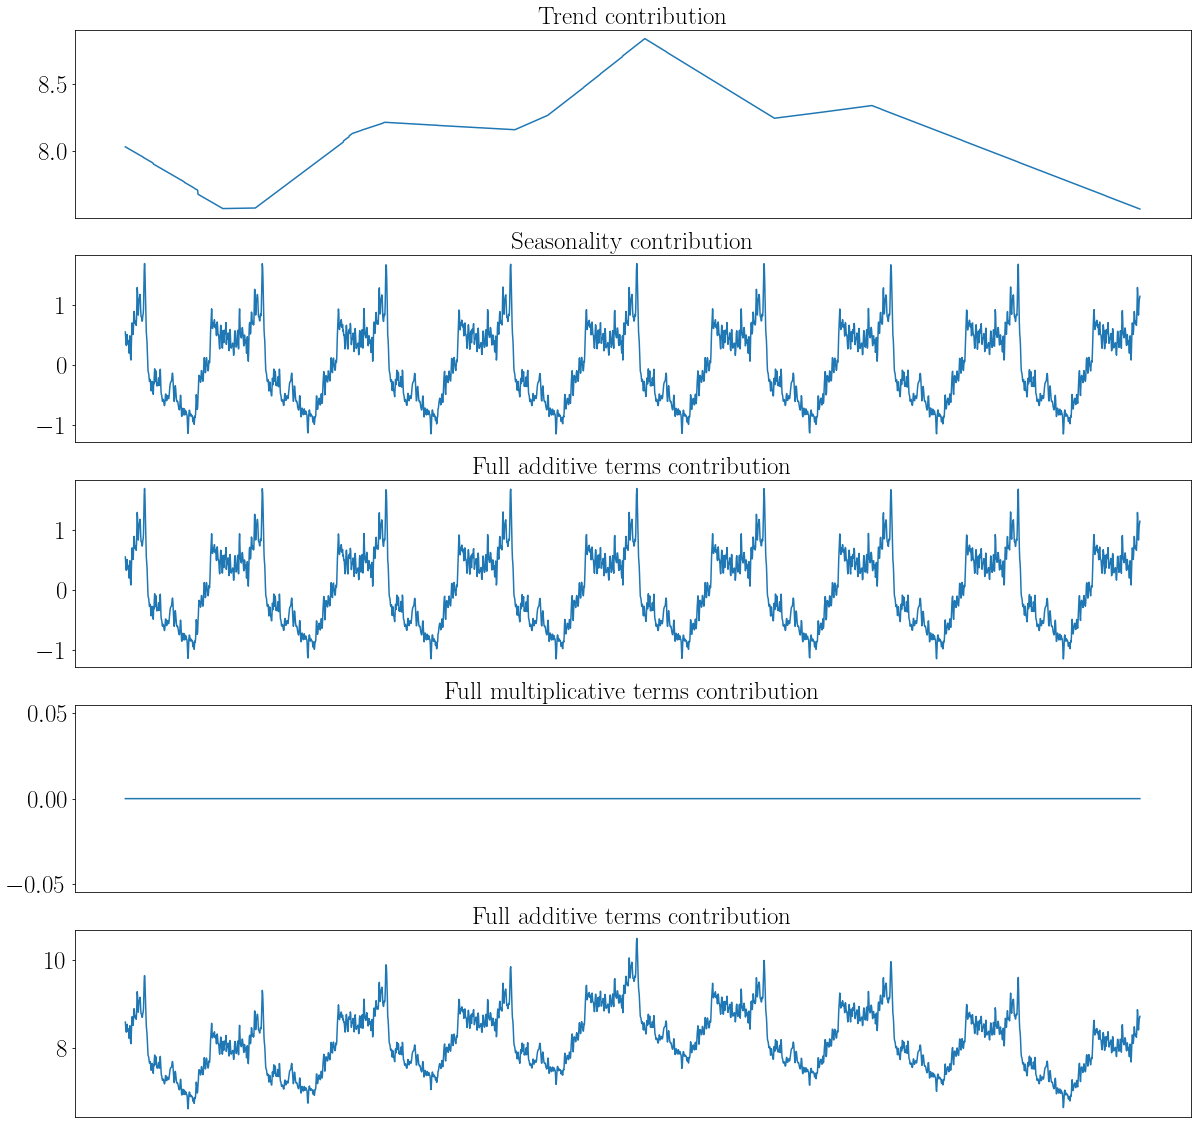

In [22]:
## Visualize the contribution of the individual models to the prediction. y(t) = g(t)+s(t) etc
print(forecast.keys())

x = np.arange(0,len(df['y']))

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(20,20))

    
ax1.plot(forecast['trend'])
ax1.fill_between(np.arange(0,len(forecast['trend'])),forecast['trend_lower'],forecast['trend_upper'],alpha = 0.5)
ax1.set_title('Trend contribution')
ax1.set_xticks([])

ax2.plot(forecast['yearly'])
ax2.fill_between(np.arange(0,len(forecast['yearly'])),forecast['yearly_lower'],forecast['yearly_upper'],alpha = 0.5)
ax2.set_title('Seasonality contribution')
ax2.set_xticks([])

ax3.plot(forecast['additive_terms'])
ax3.fill_between(np.arange(0,len(forecast['additive_terms'])),forecast['additive_terms_lower'],forecast['additive_terms_upper'],alpha = 0.5)
ax3.set_title('Full additive terms contribution')
ax3.set_xticks([])

ax4.plot(forecast['multiplicative_terms'])
ax4.fill_between(np.arange(0,len(forecast['multiplicative_terms'])),forecast['multiplicative_terms_lower'],forecast['multiplicative_terms_upper'],alpha = 0.9)
ax4.set_title('Full multiplicative terms contribution')
ax4.set_xticks([])


ax5.plot(forecast['trend']+forecast['additive_terms'])
ax5.set_title('Full additive terms contribution')
ax5.set_xticks([])

In [23]:
## ========================================================================================== ##
## ===================================== CASE STUDY 3  ====================================== ##
## Conditional seasonalities. Prophet can fit different seasonalities in different parts of the year
#  For example a Mercadona shop in Gandía or Alicante has a different behaviour between June, July and August
#  than in the rest of the year. Probably the period is different for different reasons. A mercadona in the 
#  beach can sell around 7 millions euros per summer month, while in winter they even reach 1 million (I know this
#  from a friend). Second, in Gandía in summer lots of young people get very drunk, obviously the number of small
#  buys increases

#  Prophet allow us to do this. Mathematically the idea is very simple. You learn two different seasonality models
#  and apply each one on the dates to be chosen through a boolean variable. Let's see this with a monthly example.
#  Prophet tutorials has a nicer one and how this can be chosen manually.

N_summer = 100   
N_winter = 1        
    
## Create prophet model
model = Prophet(
                    interval_width      = 0.95,  
                    uncertainty_samples = 1000,
                    yearly_seasonality  = False,  # deactivate seasonality since prophet adds a year seasonality over all time   
                    weekly_seasonality  = False,  
                    daily_seasonality   = False ,  
                    seasonality_mode    = 'additive' 
                )


## Filter out all years except one so that we can see the effect
df_year = df[df['ds'].dt.year.eq(2009)]

## Add a boolean column to the dataset where this will be specified.
def is_summer(ds):
    date = pd.to_datetime(ds)

    return (date.month >= 6 and date.month <= 8)

df_year['is_summer'] = df_year['ds'].apply(is_summer)
df_year['is_winter'] = ~df_year['ds'].apply(is_summer)

## Add custom seasonality as we saw before but specifying a condition
model.add_seasonality( name = 'summer', period=30, fourier_order = N_summer, condition_name = 'is_summer')
model.add_seasonality( name = 'winter', period=30, fourier_order = N_winter, condition_name = 'is_winter')

/tmp/ipykernel_1814523/3158621393.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['is_summer'] = df_year['ds'].apply(is_summer)
/tmp/ipykernel_1814523/3158621393.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['is_winter'] = ~df_year['ds'].apply(is_summer)


In [24]:
df_year

,ds,y,ds_plot,is_summer,is_winter
359,2009-01-01,7.758761,2009-01-01,False,True
360,2009-01-02,8.808220,2009-01-02,False,True
361,2009-01-03,9.121946,2009-01-03,False,True
362,2009-01-04,10.153818,2009-01-04,False,True
363,2009-01-05,9.267854,2009-01-05,False,True
...,...,...,...,...,...
710,2009-12-27,9.162934,2009-12-27,False,True
711,2009-12-28,9.547955,2009-12-28,False,True
712,2009-12-29,9.017241,2009-12-29,False,True
713,2009-12-30,8.784928,2009-12-30,False,True


In [25]:
model.fit(df_year)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.66377


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       981.858    0.00331428       95.4018           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       985.241   0.000299137       120.383   1.242e-06       0.001      214  LS failed, Hessian reset 
     199       986.436   3.35335e-05       61.6928      0.7299      0.7299      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     293       986.745   0.000162605       56.6782   2.684e-06       0.001      484  LS failed, Hessian reset 
     299       986.748   4.63002e-05        61.537      0.3572           1      493   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       986.903   5.32266e-05        56.307   8.415e-07       0.001      604  LS failed, Hessian reset 
     399       986.911   0.000119471  

In [26]:
forecast = model.predict(df_year)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [27]:
## Make a prediction.

print(model.params.keys())

print('Sigma observation model \n ', model.params['sigma_obs'])

print('Fourier coefficients    \n ', model.params['beta'].shape) 

print('Places where prophet thinks a change point appears \n ', model.params['delta'].shape)

print('Growth rate parameter \n',  model.params['k'].shape)

print('Offset parameter \n',  model.params['m'].shape)

print('No idea \n', model.params['trend'].shape)

dict_keys(['k', 'm', 'delta', 'sigma_obs', 'beta', 'trend'])
Sigma observation model 
  [[0.03566277]]
Fourier coefficients    
  (1, 202)
Places where prophet thinks a change point appears 
  (1, 25)
Growth rate parameter 
 (1, 1)
Offset parameter 
 (1, 1)
No idea 
 (1, 356)


Text(0.5, 1.0, 'Full forecast')

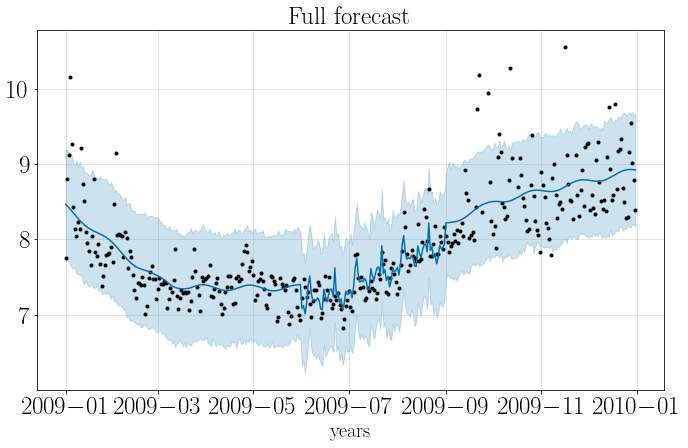

In [28]:
## Visualize forecasting
fig = model.plot(forecast)
plt.xlabel('years')
plt.ylabel('')
plt.title('Full forecast')

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 146.8592120368929, 'Year')

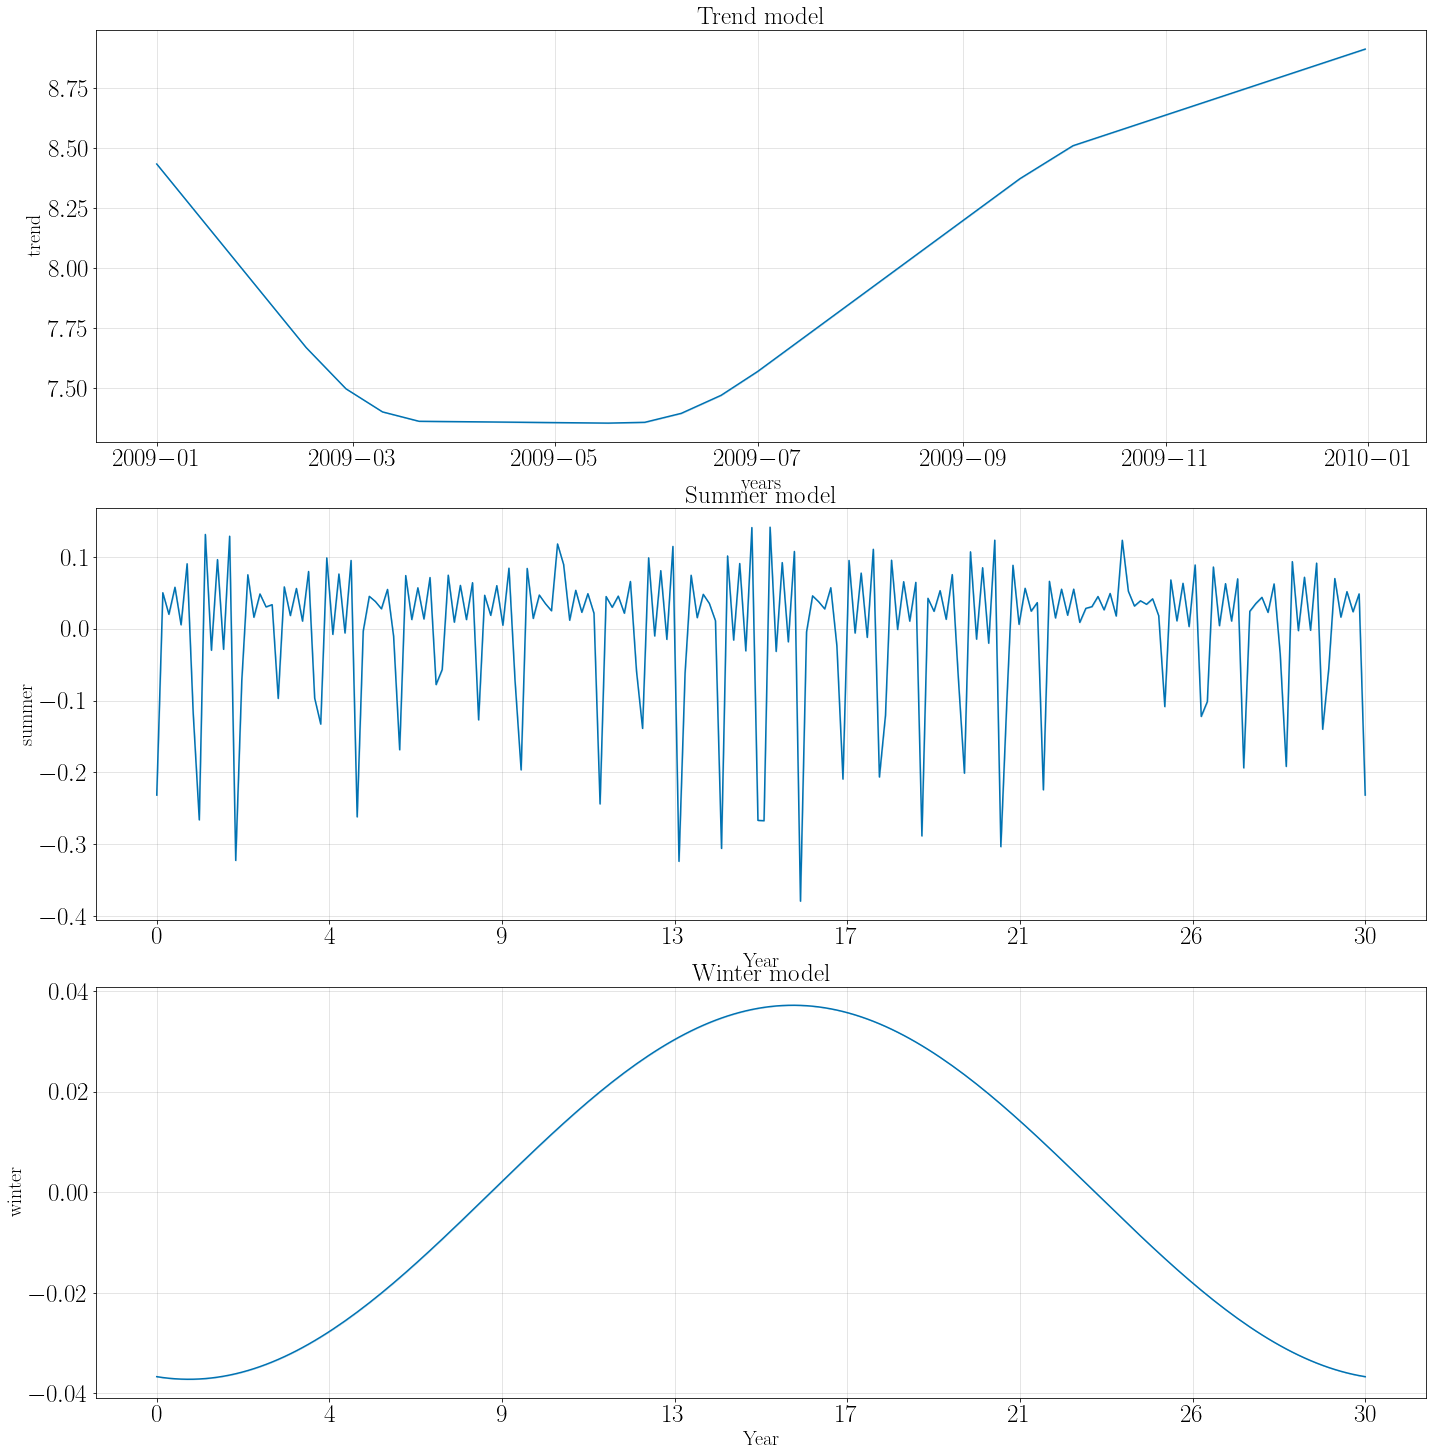

In [29]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(forecast, figsize = (20,20) )


ax1,ax2, ax3 = fig.get_axes()


ax1.set_xlabel('years')
ax1.set_title('Trend model')

ax2.set_title('Summer model')
ax2.set_xlabel('Year')

ax3.set_title('Winter model')
ax3.set_xlabel('Year')

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'summer', 'summer_lower', 'summer_upper', 'winter', 'winter_lower',
       'winter_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


[]

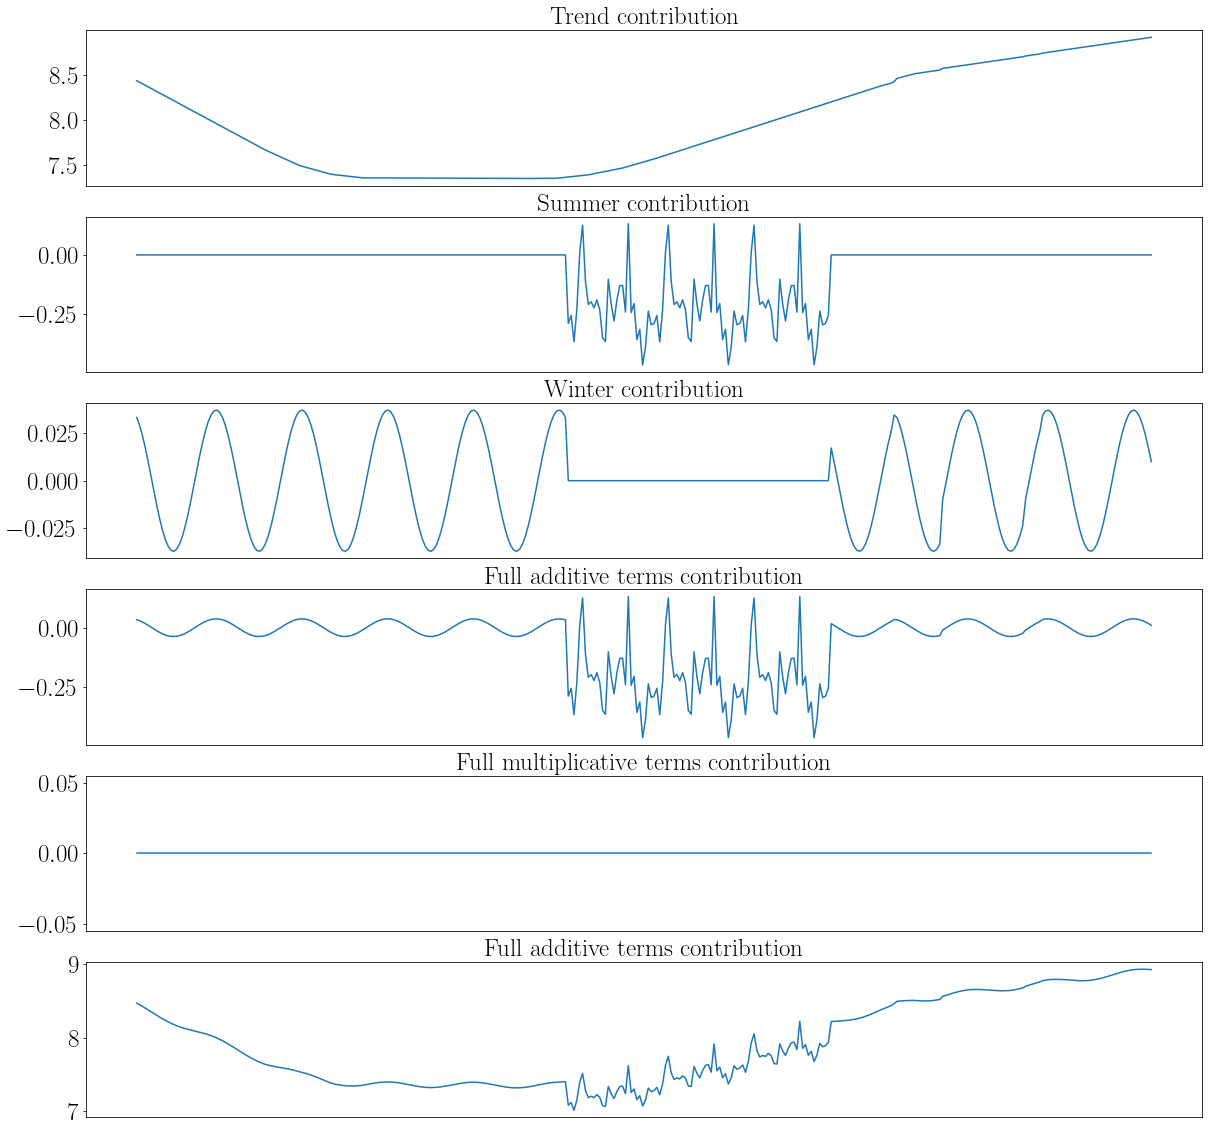

In [30]:
## Visualize the contribution of the individual models to the prediction. y(t) = g(t)+s(t) etc
print(forecast.keys())

x = np.arange(0,len(df['y']))

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(20,20))

    
ax1.plot(forecast['trend'])
ax1.fill_between(np.arange(0,len(forecast['trend'])),forecast['trend_lower'],forecast['trend_upper'],alpha = 0.5)
ax1.set_title('Trend contribution')
ax1.set_xticks([])

ax2.plot(forecast['summer'])
ax2.fill_between(np.arange(0,len(forecast['summer'])),forecast['summer_lower'],forecast['summer_upper'],alpha = 0.5)
ax2.set_title('Summer contribution')
ax2.set_xticks([])

ax3.plot(forecast['winter'])
ax3.fill_between(np.arange(0,len(forecast['winter'])),forecast['winter_lower'],forecast['winter_upper'],alpha = 0.5)
ax3.set_title('Winter contribution')
ax3.set_xticks([])


ax4.plot(forecast['additive_terms'])
ax4.fill_between(np.arange(0,len(forecast['additive_terms'])),forecast['additive_terms_lower'],forecast['additive_terms_upper'],alpha = 0.5)
ax4.set_title('Full additive terms contribution')
ax4.set_xticks([])

ax5.plot(forecast['multiplicative_terms'])
ax5.fill_between(np.arange(0,len(forecast['multiplicative_terms'])),forecast['multiplicative_terms_lower'],forecast['multiplicative_terms_upper'],alpha = 0.9)
ax5.set_title('Full multiplicative terms contribution')
ax5.set_xticks([])


ax6.plot(forecast['trend']+forecast['additive_terms'])
ax6.set_title('Full additive terms contribution')
ax6.set_xticks([])

In [37]:
## ========================================================================================== ##
## ===================================== CASE STUDY 4  ====================================== ##
## Prior on the seasonality coefficient.
#  Prior on the seasonality coefficients. Prophets uses a Normal prior. When using point estimate this is similar
#  to an L2 regularizer with the coefficient of the regularizer being proportional to the variance of the Gaussian
#  When using MCMC; this is the prior used by the HMC when simulating dynamics.

Prior_scale = 0.0000001 # higher variance -> lower L2 coefficient. The mean of the Normal is 0.0
                        # Huge prior scale makes the model be more wiggly (over fit)
                        # Very small prior makes the L2 coefficient very high which drives the parameters to 0.0
                        #     So you will se a constant series since the coefficients of the sine and cosine are 0
            
                        # The choice of this parameter when you fit the model using MCMC must take into account
                        # your prior belief about the series, otherwise the prior will be mispecified and thus
                        # biasing uncertainty quantification. This is a much more complex story that requires
                        # time to talk about.

## Create prophet model
model = Prophet(
                    interval_width      = 0.95,  
                    uncertainty_samples = 1000,
                    yearly_seasonality  = False,  
                    weekly_seasonality  = False,  
                    daily_seasonality   = False ,  
                    seasonality_mode    = 'additive' 
                )


model.add_seasonality( name = 'yearly', period = 365, fourier_order = 10, prior_scale = Prior_scale )

In [38]:
model.fit(df)

Initial log joint probability = -19.4685


/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      12        2697.2   0.000215417         12657           1           1       44   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [39]:
forecast = model.predict(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Full forecast')

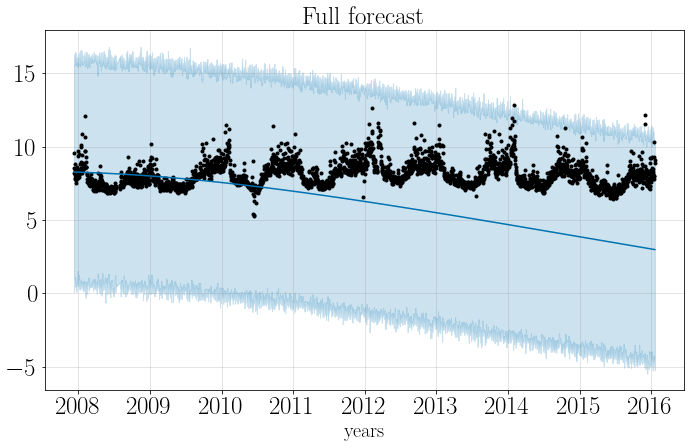

In [40]:
## Visualize forecasting
fig = model.plot(forecast)
plt.xlabel('years')
plt.ylabel('')
plt.title('Full forecast')

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 146.85921203689307, 'Year')

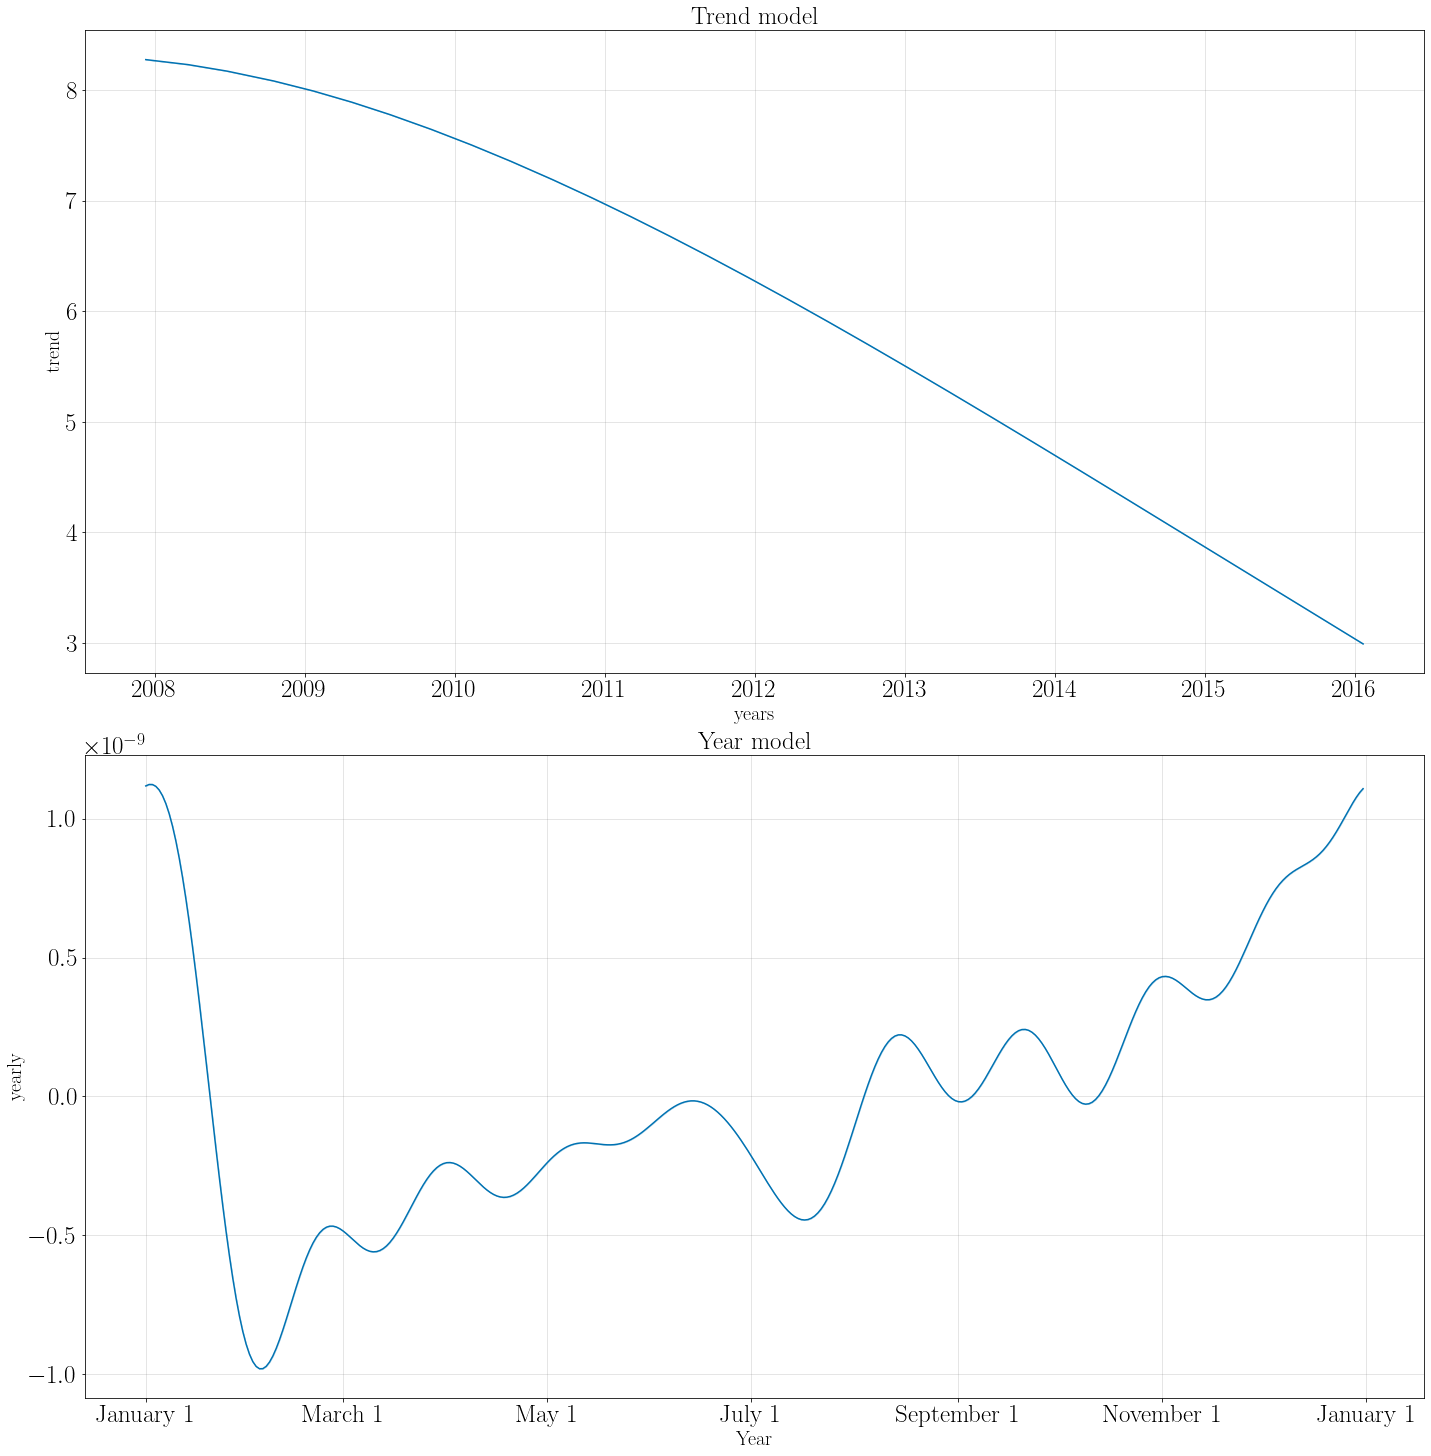

In [41]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(forecast, figsize = (20,20) )


ax1,ax2 = fig.get_axes()


ax1.set_xlabel('years')
ax1.set_title('Trend model')

ax2.set_title('Year model')
ax2.set_xlabel('Year')


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


[]

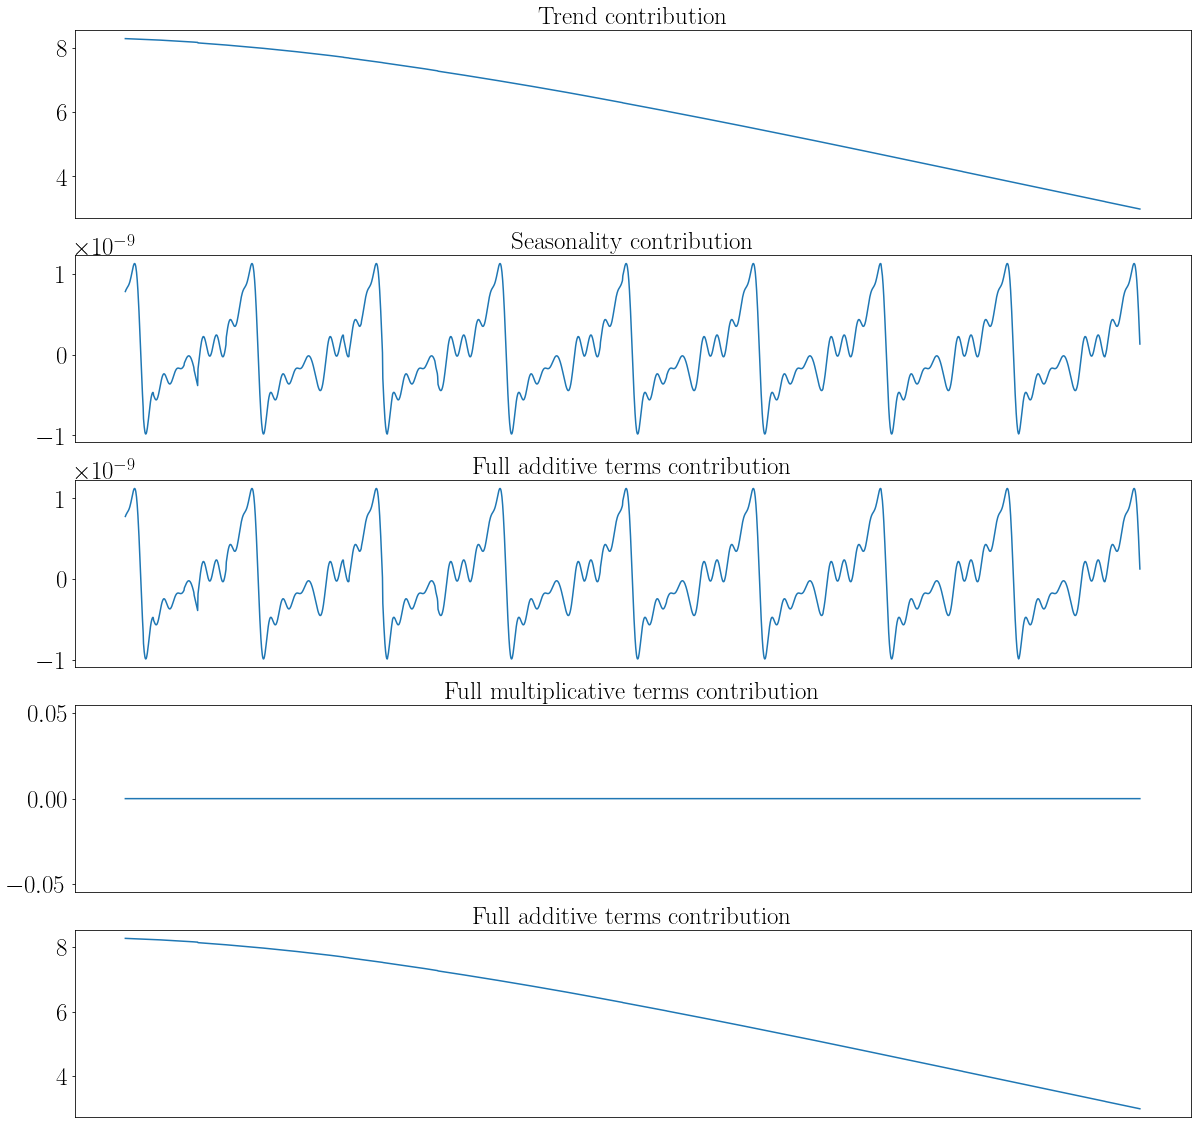

In [42]:
## Visualize the contribution of the individual models to the prediction. y(t) = g(t)+s(t) etc
print(forecast.keys())

x = np.arange(0,len(df['y']))

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(20,20))

    
ax1.plot(forecast['trend'])
ax1.fill_between(np.arange(0,len(forecast['trend'])),forecast['trend_lower'],forecast['trend_upper'],alpha = 0.5)
ax1.set_title('Trend contribution')
ax1.set_xticks([])

ax2.plot(forecast['yearly'])
ax2.fill_between(np.arange(0,len(forecast['yearly'])),forecast['yearly_lower'],forecast['yearly_upper'],alpha = 0.5)
ax2.set_title('Seasonality contribution')
ax2.set_xticks([])

ax3.plot(forecast['additive_terms'])
ax3.fill_between(np.arange(0,len(forecast['additive_terms'])),forecast['additive_terms_lower'],forecast['additive_terms_upper'],alpha = 0.5)
ax3.set_title('Full additive terms contribution')
ax3.set_xticks([])

ax4.plot(forecast['multiplicative_terms'])
ax4.fill_between(np.arange(0,len(forecast['multiplicative_terms'])),forecast['multiplicative_terms_lower'],forecast['multiplicative_terms_upper'],alpha = 0.9)
ax4.set_title('Full multiplicative terms contribution')
ax4.set_xticks([])


ax5.plot(forecast['trend']+forecast['additive_terms'])
ax5.set_title('Full additive terms contribution')
ax5.set_xticks([])